#  Week 1 – Module 1: Data Collection and Understanding  

## Smart Home Energy Consumption Analysis

### Objective:
- **Defining project scope and functional objectives** for smart energy analysis  
- **Loading and structuring** the smart home energy monitoring dataset  
- **Verifying data integrity** and handling missing timestamps  
- **Performing exploratory data analysis (EDA)** with visualizations  
- **Organizing energy readings** by device, room, and timestamp for further analysis


In [1]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Jupyter inline plots
%matplotlib inline

# Plotting styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

#  Project Scope and Functional Objectives

This project focuses on analyzing smart home energy consumption to extract insights and prepare the dataset for further modeling.

- **Project Goal:** Analyze smart home energy usage patterns to optimize consumption.  
- **Functional Objectives:**  
  1. Understand device-wise and room-wise energy usage  
  2. Handle missing and inconsistent data  
  3. Explore energy consumption trends over time  
  4. Prepare the dataset for forecasting and modeling in later modules


In [2]:
# Load Dataset
file_path = "HomeC_augmented.csv"   
df = pd.read_csv(file_path)
print(f"Dataset loaded successfully! Shape: {df.shape}")

# Normalize column names (lowercase, remove spaces/special chars)
df.columns = df.columns.str.lower().str.replace('[^a-z0-9 ]','',regex=True).str.strip()

# Rename timestamp column (if necessary)
if 'time' in df.columns:
    df.rename(columns={'time':'timestamp'}, inplace=True)
# Convert to datetime and drop invalid timestamps
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
# Sort and set as index
df = df.sort_values('timestamp')
df = df.set_index('timestamp')
print("Timestamp fixed and set as index")
df.head()

Dataset loaded successfully! Shape: (503910, 42)
Timestamp fixed and set as index


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,0.932833,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746
2016-01-01 05:01:00,1,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,0.934333,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249
2016-01-01 05:02:00,2,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,0.931817,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971
2016-01-01 05:03:00,3,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,1.022050,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673
2016-01-01 05:04:00,4,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,1.139400,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006


#  Inspect Dataset Structure

- View column names, data types, and sample rows  
- Identify timestamp, device, room, and other contextual features


In [3]:
# Create datetime index ONLY if not already present
if not isinstance(df.index, pd.DatetimeIndex):
    df['timestamp'] = pd.to_datetime(
        df[['year', 'month', 'day', 'hour', 'minute']],
        errors='coerce'
    )
    df = df.dropna(subset=['timestamp'])
    df = df.set_index('timestamp')
    print("Datetime index created from year-month-day-hour-minute")

# Resample numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df_resampled = df[numeric_cols].resample('1min').mean()

# Interpolate missing values
df_resampled = df_resampled.interpolate(method='time').ffill().bfill()

print(f"Resampled numeric data shape: {df_resampled.shape}")
df_resampled.head()

Resampled numeric data shape: (503910, 39)


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.0,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,0.932833,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746
2016-01-01 05:01:00,1.0,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,0.934333,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249
2016-01-01 05:02:00,2.0,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,0.931817,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971
2016-01-01 05:03:00,3.0,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,1.022050,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673
2016-01-01 05:04:00,4.0,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,1.139400,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006


In [4]:
# Create df_resampled_energy

# List of energy device columns (normalized to match df columns)
energy_columns = [
    'dishwasher', 'home office', 'fridge', 'wine cellar', 'garage door',
    'barn', 'well', 'microwave', 'living room', 'furnace', 'kitchen',
    'car charger kw', 'water heater kw', 'air conditioning kw',
    'home theater kw', 'outdoor lights kw', 'laundry kw', 'pool pump kw'
]

# Keep only columns that actually exist in the dataset
energy_columns = [col for col in energy_columns if col in df_resampled.columns]
print("Energy columns found:", energy_columns)
# Extract energy device data from df_resampled
df_resampled_energy = df_resampled[energy_columns].copy()
# Fill any remaining missing values
df_resampled_energy = df_resampled_energy.interpolate(method='time').ffill().bfill()

print("df_resampled_energy ready!")
df_resampled_energy.head()

Energy columns found: ['dishwasher', 'home office', 'fridge', 'wine cellar', 'garage door', 'barn', 'well', 'microwave', 'living room', 'furnace', 'kitchen', 'car charger kw', 'water heater kw', 'air conditioning kw', 'home theater kw', 'outdoor lights kw', 'laundry kw', 'pool pump kw']
df_resampled_energy ready!


,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,furnace,kitchen,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567,0.013034,0.000241,0.013796,0.000519,0.0014,0.000000,0.000746
2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567,0.021769,0.000978,0.014487,0.000543,0.0008,0.000000,0.002249
2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617,0.028218,0.000642,0.014498,0.000481,0.0012,0.001883,0.003971
2016-01-01 05:03:00,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650,0.036478,0.000218,0.014181,0.000531,0.0016,0.002610,0.003673
2016-01-01 05:04:00,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783,0.044295,0.000844,0.014949,0.001052,0.0020,0.002462,0.005006


In [5]:
# Inspect Dataset Structure

print("Columns and Data Types:")
print(df.dtypes)  # Shows original raw dataset columns
print("\nSample rows:")
display(df.head())

# List of device columns (exclude timestamp if it exists)
# Use df_resampled to focus on numeric/device columns
device_columns = df_resampled.columns.tolist()
print(f"\nNumber of device columns (numeric/energy devices): {len(device_columns)}")
print("Device columns:", device_columns)

Columns and Data Types:
unnamed 0                int64
dishwasher             float64
home office            float64
fridge                 float64
wine cellar            float64
garage door            float64
barn                   float64
well                   float64
microwave              float64
living room            float64
temperature            float64
humidity               float64
visibility             float64
apparenttemperature    float64
pressure               float64
windspeed              float64
cloudcover             float64
windbearing            float64
precipintensity        float64
dewpoint               float64
precipprobability      float64
furnace                float64
kitchen                float64
year                     int64
month                    int64
day                      int64
weekday                 object
weekofyear               int64
hour                     int64
minute                   int64
timing                  object
useho          

,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,0.932833,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746
2016-01-01 05:01:00,1,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,0.934333,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249
2016-01-01 05:02:00,2,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,0.931817,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971
2016-01-01 05:03:00,3,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,1.022050,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673
2016-01-01 05:04:00,4,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,1.139400,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006



Number of device columns (numeric/energy devices): 39
Device columns: ['unnamed 0', 'dishwasher', 'home office', 'fridge', 'wine cellar', 'garage door', 'barn', 'well', 'microwave', 'living room', 'temperature', 'humidity', 'visibility', 'apparenttemperature', 'pressure', 'windspeed', 'cloudcover', 'windbearing', 'precipintensity', 'dewpoint', 'precipprobability', 'furnace', 'kitchen', 'year', 'month', 'day', 'weekofyear', 'hour', 'minute', 'useho', 'gensol', 'car charger kw', 'water heater kw', 'air conditioning kw', 'home theater kw', 'outdoor lights kw', 'microwave kw', 'laundry kw', 'pool pump kw']


#  Verify Data Integrity

- Check for missing or null values per column  
- Identify and count duplicate rows  
- Verify timestamp consistency and estimate missing records  


# Step 1:🛠 Check for Missing or Null Values

Missing values per column:
unnamed 0              0
dishwasher             0
home office            0
fridge                 0
wine cellar            0
garage door            0
barn                   0
well                   0
microwave              0
living room            0
temperature            0
humidity               0
visibility             0
apparenttemperature    0
pressure               0
windspeed              0
cloudcover             0
windbearing            0
precipintensity        0
dewpoint               0
precipprobability      0
furnace                0
kitchen                0
year                   0
month                  0
day                    0
weekofyear             0
hour                   0
minute                 0
useho                  0
gensol                 0
car charger kw         0
water heater kw        0
air conditioning kw    0
home theater kw        0
outdoor lights kw      0
microwave kw           0
laundry kw             0
pool pump kw           

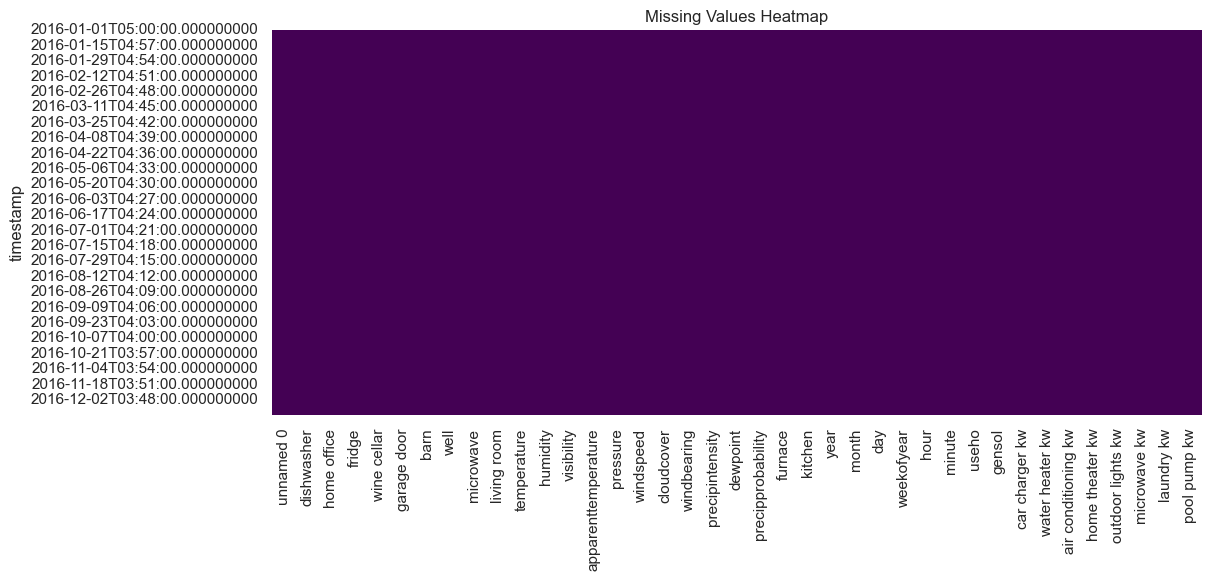

In [6]:
# Missing Values Check and Visualization

# Count missing values per column
missing_values = df_resampled.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12,5))
sns.heatmap(df_resampled.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#  Step 2: Verify Data Integrity

- Check for missing values  
- Check for duplicate rows  
- Check timestamp consistency


In [7]:
# Verify Data Integrity

# Missing values
print("Missing values per column:")
print(df_resampled.isnull().sum())

# Duplicates
print(f"\nNumber of duplicate rows: {df_resampled.duplicated().sum()}")

# Timestamp consistency (intervals)
time_diffs = df_resampled.index.to_series().diff().dropna()
most_common_interval = time_diffs.mode()[0]
print("\nMost common time delta between records:", most_common_interval)

# Estimate missing timestamps
expected_records = int((df_resampled.index.max() - df_resampled.index.min()) / most_common_interval) + 1
missing_timestamps = expected_records - len(df_resampled)
print(f"Estimated number of missing timestamps: {missing_timestamps}")

Missing values per column:
unnamed 0              0
dishwasher             0
home office            0
fridge                 0
wine cellar            0
garage door            0
barn                   0
well                   0
microwave              0
living room            0
temperature            0
humidity               0
visibility             0
apparenttemperature    0
pressure               0
windspeed              0
cloudcover             0
windbearing            0
precipintensity        0
dewpoint               0
precipprobability      0
furnace                0
kitchen                0
year                   0
month                  0
day                    0
weekofyear             0
hour                   0
minute                 0
useho                  0
gensol                 0
car charger kw         0
water heater kw        0
air conditioning kw    0
home theater kw        0
outdoor lights kw      0
microwave kw           0
laundry kw             0
pool pump kw           

# Step 3: Check timestamp consistency


In [8]:
# Timestamp Consistency

# Differences between consecutive timestamps
time_diffs = df_resampled.index.to_series().diff().dropna()

# Most common interval
most_common_interval = time_diffs.mode()[0]
print(f"Most common time interval between records: {most_common_interval}")

# Irregular intervals
irregular_intervals = time_diffs[time_diffs != most_common_interval]
print(f"Number of irregular intervals: {len(irregular_intervals)}")

# Optional: show a few irregular timestamps
if not irregular_intervals.empty:
    print("\nSample of irregular intervals:")
    display(irregular_intervals.head())

# Estimated number of missing timestamps
expected_records = int((df_resampled.index.max() - df_resampled.index.min()) / most_common_interval) + 1
missing_timestamps = expected_records - len(df_resampled)
print(f"Estimated number of missing timestamps: {missing_timestamps}")

Most common time interval between records: 0 days 00:01:00
Number of irregular intervals: 0
Estimated number of missing timestamps: 0


#  Exploratory Data Analysis (EDA)

- Generate summary statistics  
- Visualize device-wise consumption  
- Create scatter plots, histograms, time series, and correlation heatmaps


In [9]:
# Summary Statistics

# Use the resampled numeric/device data
summary_stats = df_resampled.describe().T

# Add missing values count (should be 0 after resampling & filling)
summary_stats['missing_values'] = df_resampled.isnull().sum()

display(summary_stats)

,count,mean,std,min,25%,50%,75%,max,missing_values
unnamed 0,503910.0,251954.500000,145466.431410,0.000000,125977.250000,251954.500000,377931.750000,503909.000000,0
dishwasher,503910.0,0.031368,0.190951,0.000000,0.000000,0.000017,0.000233,1.401767,0
home office,503910.0,0.081287,0.104466,0.000083,0.040383,0.042217,0.068283,0.971750,0
fridge,503910.0,0.063556,0.076199,0.000067,0.005083,0.005433,0.125417,0.851267,0
wine cellar,503910.0,0.042137,0.057967,0.000017,0.007133,0.008083,0.053192,1.273933,0
garage door,503910.0,0.014139,0.014292,0.000017,0.012733,0.012933,0.013100,1.088983,0
barn,503910.0,0.058530,0.202706,0.000000,0.029833,0.031317,0.032883,7.027900,0
well,503910.0,0.015642,0.137841,0.000000,0.000983,0.001000,0.001017,1.633017,0
microwave,503910.0,0.010983,0.098859,0.000000,0.003617,0.004000,0.004067,1.929800,0
living room,503910.0,0.035313,0.096056,0.000000,0.001483,0.001617,0.001750,0.465217,0


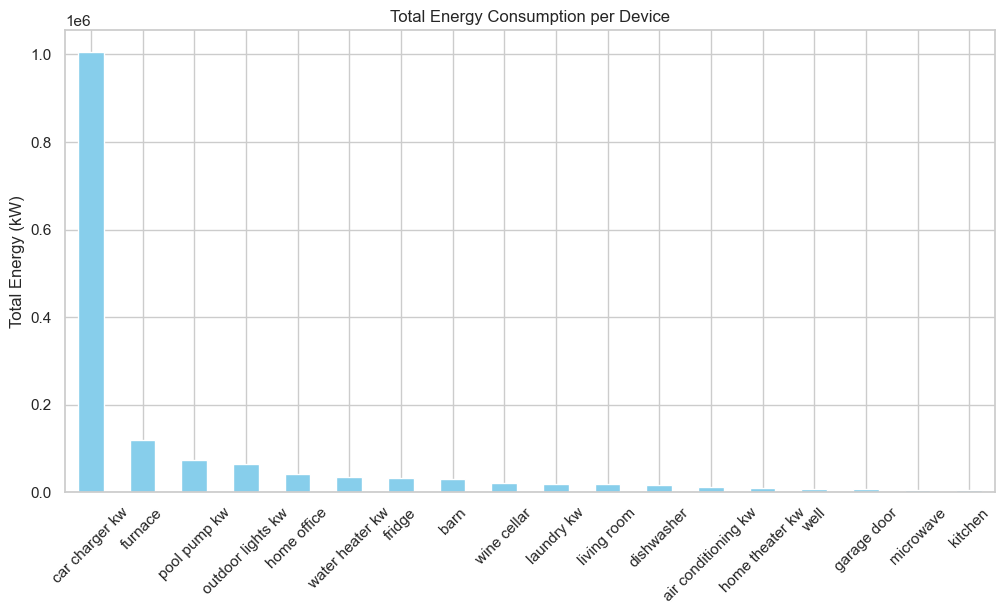

In [10]:
# Device-wise Total Energy Consumption

# Sum total energy consumption per device
device_totals = df_resampled_energy.sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
device_totals.plot(kind='bar', color='skyblue')
plt.title("Total Energy Consumption per Device")
plt.ylabel("Total Energy (kW)")
plt.xticks(rotation=45)
plt.show()

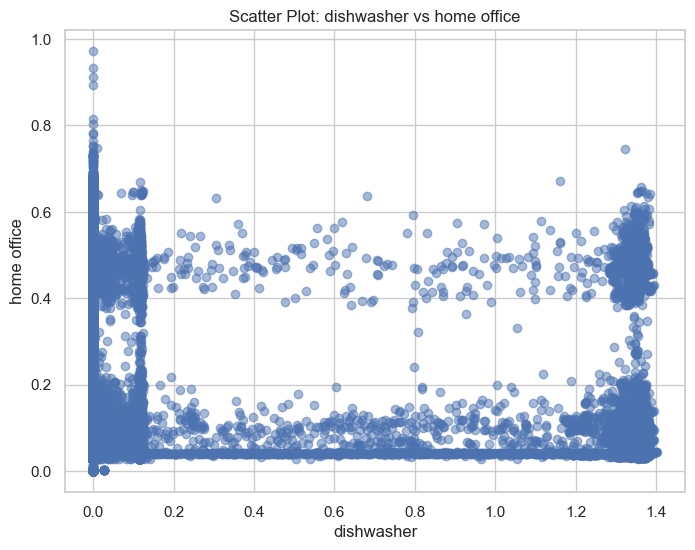

In [11]:
# Scatter Plot Between Two Energy Devices

# Define energy device columns
device_columns = df_resampled_energy.columns.tolist()

# Check we have at least 2 devices
if len(device_columns) >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(df_resampled_energy[device_columns[0]], df_resampled_energy[device_columns[1]], alpha=0.5)
    plt.xlabel(device_columns[0])
    plt.ylabel(device_columns[1])
    plt.title(f"Scatter Plot: {device_columns[0]} vs {device_columns[1]}")
    plt.show()
else:
    print("Not enough energy device columns to plot a scatter plot.")

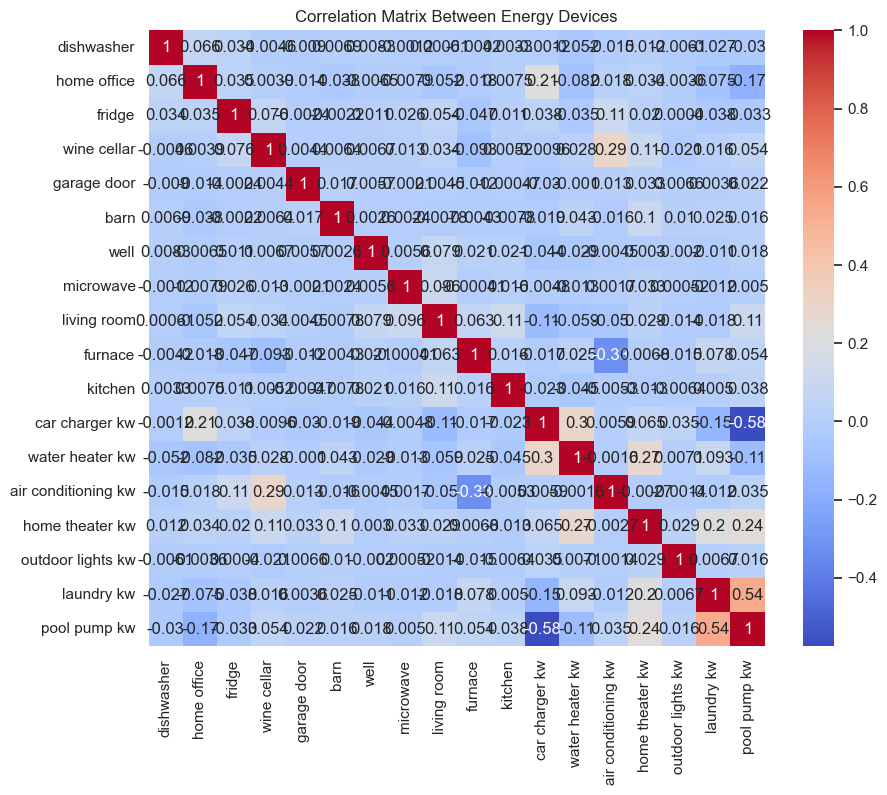

In [12]:
# Correlation Heatmap Between Energy Devices 
plt.figure(figsize=(10,8))
sns.heatmap(df_resampled_energy.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix Between Energy Devices")
plt.show()

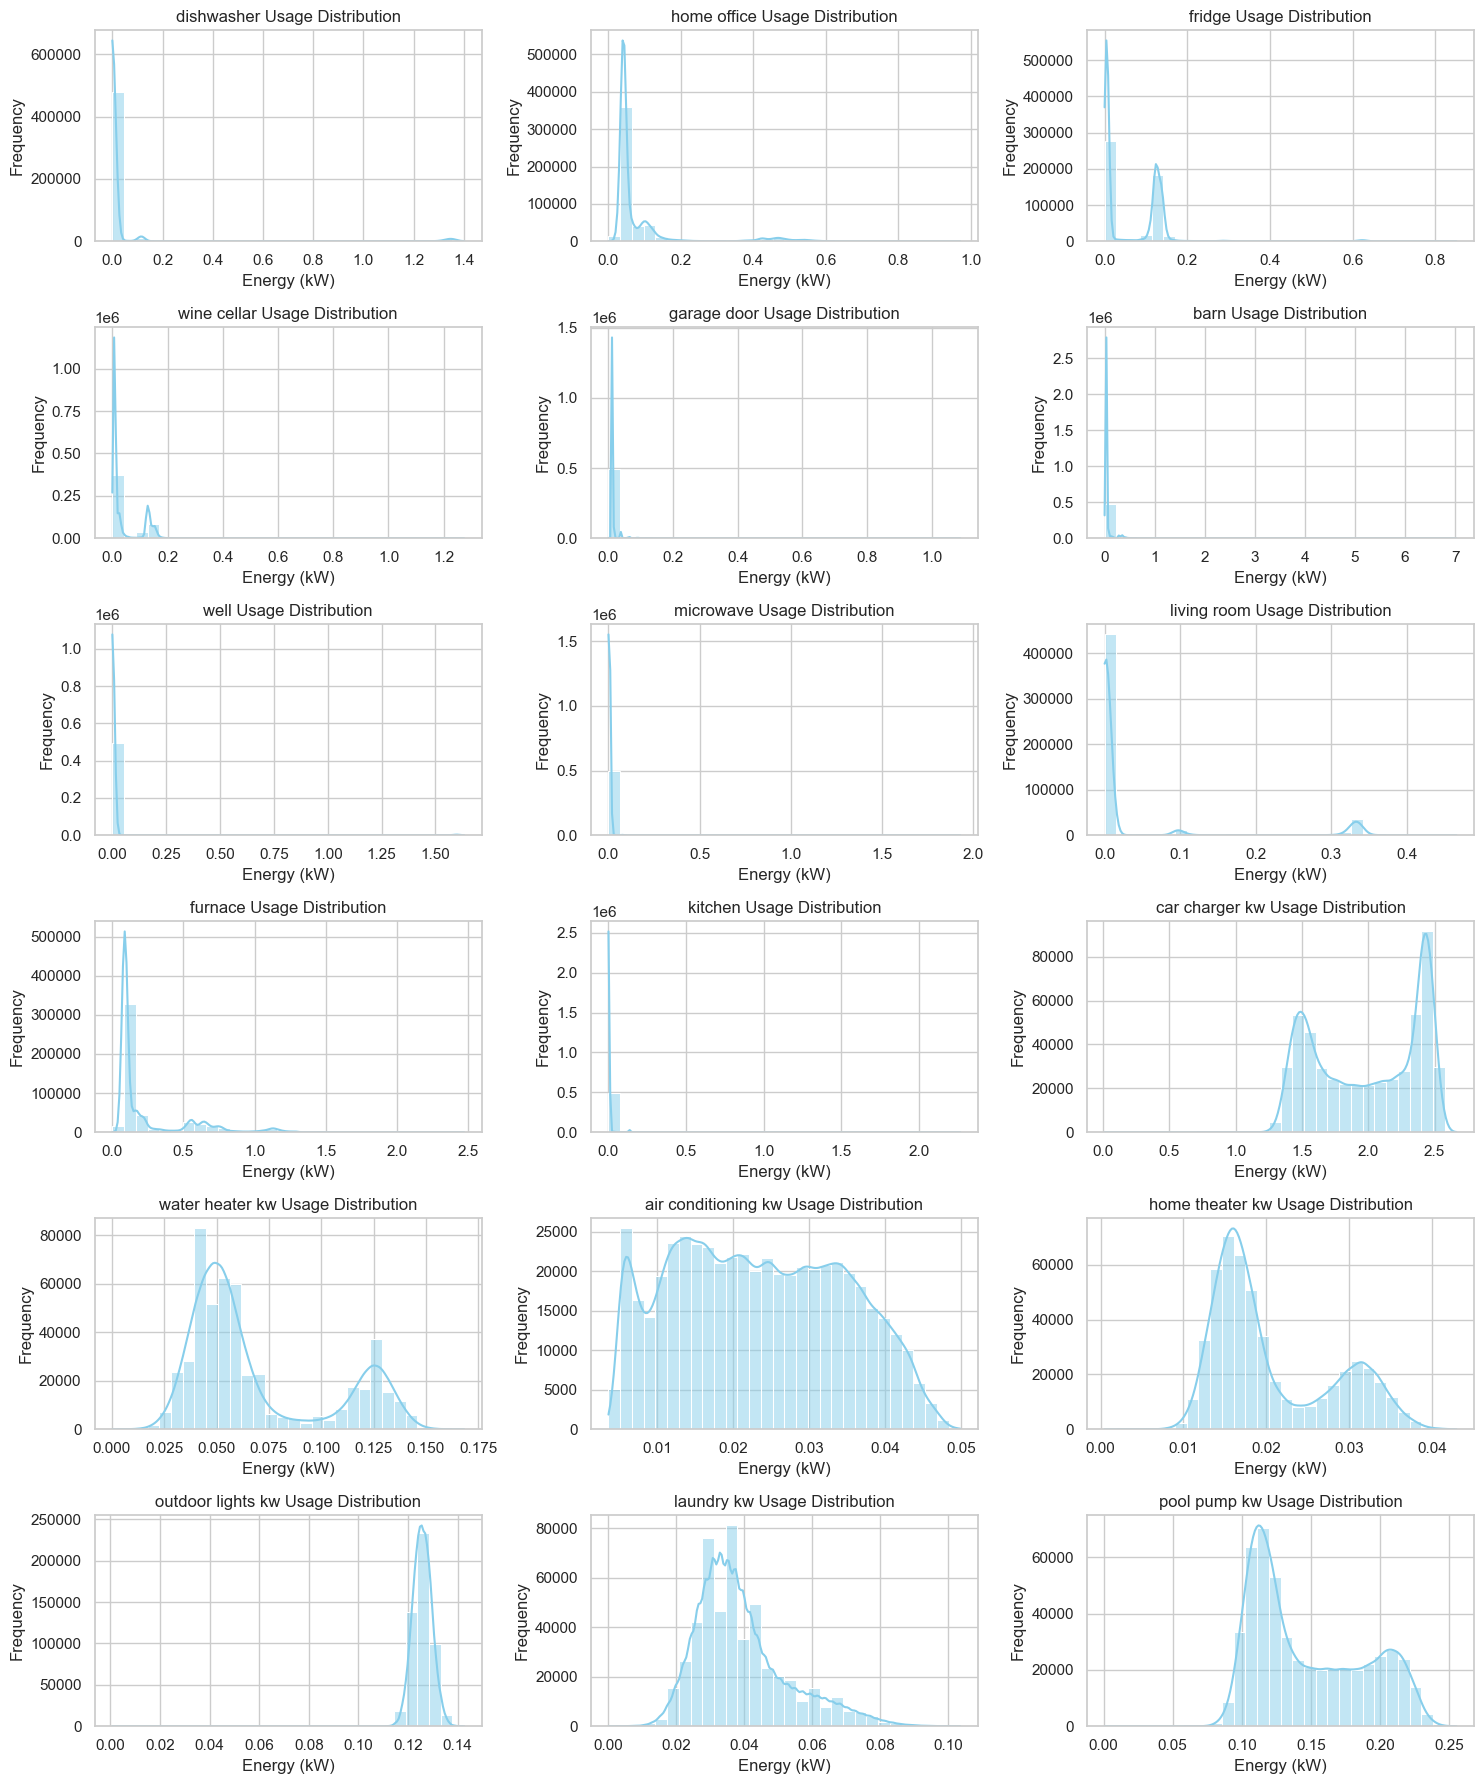

In [13]:
# Distribution Plots for Each Energy Device 

device_columns = df_resampled_energy.columns.tolist()
n_devices = len(device_columns)
n_cols = 3
n_rows = math.ceil(n_devices / n_cols)

plt.figure(figsize=(15, n_rows*3))
for i, device in enumerate(device_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df_resampled_energy[device], bins=30, kde=True, color='skyblue')
    plt.title(f"{device} Usage Distribution")
    plt.xlabel("Energy (kW)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

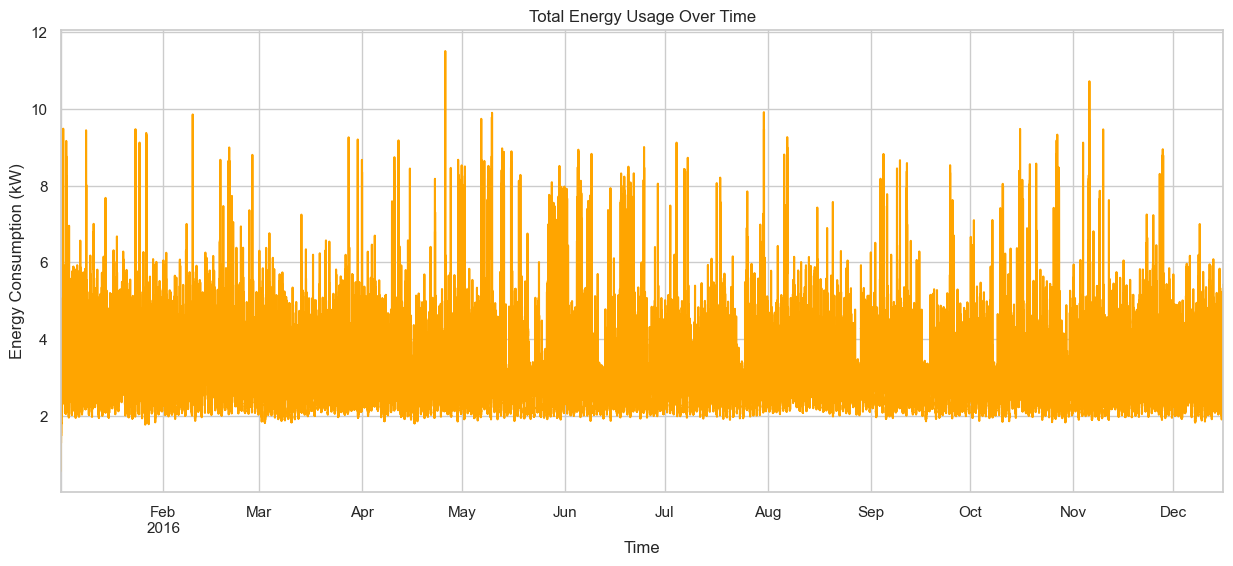

In [14]:
# Time Series of Total Energy Usage

plt.figure(figsize=(15,6))

# Sum all energy device columns to get total home energy
df_resampled_energy = df_resampled_energy.copy()  # avoid SettingWithCopyWarning
df_resampled_energy['total_energy'] = df_resampled_energy.sum(axis=1)

# Plot total energy over time
df_resampled_energy['total_energy'].plot(color='orange')
plt.title("Total Energy Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kW)")
plt.show()

#  Organize Energy Readings by Device

- Convert the dataset from **wide to long format**  


In [15]:
# Convert Wide-to-Long Format for Energy Devices

# Exclude 'total_energy' from melting
energy_device_cols = [col for col in df_resampled_energy.columns if col != 'total_energy']

df_long = df_resampled_energy.reset_index().melt(
    id_vars='timestamp',
    value_vars=energy_device_cols,
    var_name='device',
    value_name='energy_usage'
)

df_long.head()

,timestamp,device,energy_usage
0,2016-01-01 05:00:00,dishwasher,0.000033
1,2016-01-01 05:01:00,dishwasher,0.000000
2,2016-01-01 05:02:00,dishwasher,0.000017
3,2016-01-01 05:03:00,dishwasher,0.000017
4,2016-01-01 05:04:00,dishwasher,0.000133


#  Device Usage Balance Check

- Calculate total energy consumption per device  
- Compute the proportion of total home energy each device contributes  
- Visualize the distribution of energy usage across devices  
- Highlight devices that account for more than 20% of total energy


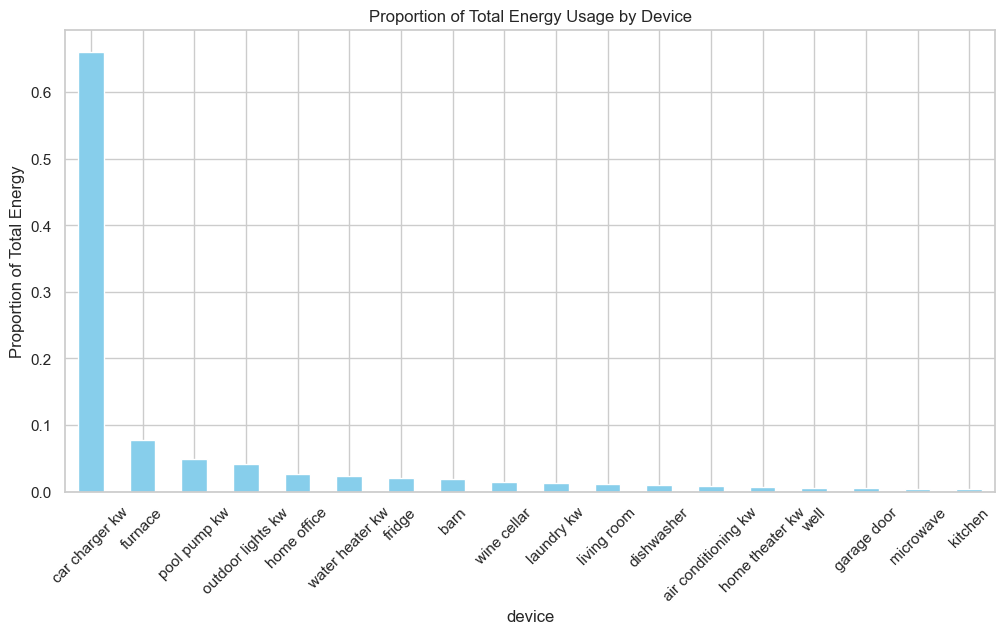

Devices with >20% of total usage:
device
car charger kw    0.660859
Name: energy_usage, dtype: float64


In [16]:
# Device Usage Balance Check

# Sum total energy per device
device_sums = df_long.groupby('device')['energy_usage'].sum().sort_values(ascending=False)

# Calculate proportion of total usage
total_usage = device_sums.sum()
device_ratios = device_sums / total_usage

# Plot device usage proportions
plt.figure(figsize=(12,6))
device_ratios.plot(kind='bar', color='skyblue')
plt.title("Proportion of Total Energy Usage by Device")
plt.ylabel("Proportion of Total Energy")
plt.xticks(rotation=45)
plt.show()

# Highlight devices that dominate consumption
print("Devices with >20% of total usage:")
print(device_ratios[device_ratios > 0.2])

In [17]:
# Save preprocessed data and energy columns for future modules 
df_resampled_energy.to_csv('preprocessed_energy_data.csv')

import json
with open('energy_columns.json', 'w') as f:
    json.dump(energy_columns, f)

print("Module 1 outputs saved for future use!")

Module 1 outputs saved for future use!


In [1]:
import pandas as pd

df = pd.read_csv('preprocessed_energy_data.csv')
print("Columns in CSV:", df.columns)
display(df.head())

Columns in CSV: Index(['timestamp', 'dishwasher', 'home office', 'fridge', 'wine cellar',
       'garage door', 'barn', 'well', 'microwave', 'living room', 'furnace',
       'kitchen', 'car charger kw', 'water heater kw', 'air conditioning kw',
       'home theater kw', 'outdoor lights kw', 'laundry kw', 'pool pump kw',
       'total_energy'],
      dtype='object')


,timestamp,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,furnace,kitchen,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,laundry kw,pool pump kw,total_energy
0,2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567,0.013034,0.000241,0.013796,0.000519,0.0014,0.000000,0.000746,0.737753
1,2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567,0.021769,0.000978,0.014487,0.000543,0.0008,0.000000,0.002249,0.752327
2,2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617,0.028218,0.000642,0.014498,0.000481,0.0012,0.001883,0.003971,0.762443
3,2016-01-01 05:03:00,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650,0.036478,0.000218,0.014181,0.000531,0.0016,0.002610,0.003673,0.863274
4,2016-01-01 05:04:00,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783,0.044295,0.000844,0.014949,0.001052,0.0020,0.002462,0.005006,0.999624


#  Module 2: Data Cleaning and Preprocessing
## Smart Home Energy Consumption Analysis
### Objective:
- Handle missing values and outliers in power consumption readings
- Convert timestamps to datetime format and resample data (hourly/daily)
- Normalize or scale energy values for model compatibility
- Split the dataset into training, validation, and testing sets


# Handle Missing Values

- Checks for any missing values in the dataset
- Uses forward fill (ffill) to fill missing values with the previous value
- Uses backward fill (bfill) for any remaining missing values
- Ensures the dataset has no missing entries, required for modeling


In [18]:
# Handle Missing Values

# Check for missing values before handling
print("Missing values per column before handling:")
print(df_resampled.isnull().sum())

# Fill missing values using forward fill and backward fill without modifying original DataFrame
df_cleaned = df_resampled.ffill().bfill()

# Verify missing values after handling
print("\nMissing values per column after handling:")
print(df_cleaned.isnull().sum())

Missing values per column before handling:
unnamed 0              0
dishwasher             0
home office            0
fridge                 0
wine cellar            0
garage door            0
barn                   0
well                   0
microwave              0
living room            0
temperature            0
humidity               0
visibility             0
apparenttemperature    0
pressure               0
windspeed              0
cloudcover             0
windbearing            0
precipintensity        0
dewpoint               0
precipprobability      0
furnace                0
kitchen                0
year                   0
month                  0
day                    0
weekofyear             0
hour                   0
minute                 0
useho                  0
gensol                 0
car charger kw         0
water heater kw        0
air conditioning kw    0
home theater kw        0
outdoor lights kw      0
microwave kw           0
laundry kw             0
pool pu

# Handle Outliers in Resampled Dataset

- Detects and handles extreme values in the dataset using the IQR (Interquartile Range) method
- Any value below Q1 - 1.5*IQR is capped to the lower limit
- Any value above Q3 + 1.5*IQR is capped to the upper limit
- Prevents abnormal spikes or dips from affecting the models


In [19]:
# Handle Outliers Using IQR Method

# Function to handle outliers in each column using the Interquartile Range (IQR) method
def remove_outliers(df):
    """
    Caps the outliers in each column using the IQR method.
    Any value below (Q1 - 1.5*IQR) is set to the lower bound.
    Any value above (Q3 + 1.5*IQR) is set to the upper bound.
    """
    for col in df.columns:
        # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Step 2: Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Step 3: Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Step 4: Replace values outside bounds with the calculated bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
    return df

# Apply the outlier handling function to the resampled dataset
df_resampled = remove_outliers(df_resampled)

# Confirm outliers are handled
print(" Outliers handled successfully.")
df_resampled.head()

 Outliers handled successfully.


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.0,0.000033,0.110133,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,0.932833,0.003483,0.363578,0.000241,0.013796,0.000519,0.1154,0.020147,0.007204,0.0075
2016-01-01 05:01:00,1.0,0.000000,0.110133,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,0.934333,0.003467,0.363578,0.000978,0.014487,0.000543,0.1154,0.030903,0.007204,0.0075
2016-01-01 05:02:00,2.0,0.000017,0.110133,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,0.931817,0.003467,0.363578,0.000642,0.014498,0.000481,0.1154,0.000000,0.007204,0.0075
2016-01-01 05:03:00,3.0,0.000017,0.110133,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,1.022050,0.003483,0.363578,0.000218,0.014181,0.000531,0.1154,0.024038,0.007204,0.0075
2016-01-01 05:04:00,4.0,0.000133,0.110133,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,1.139400,0.003467,0.363578,0.000844,0.014949,0.001052,0.1154,0.000000,0.007204,0.0075


# Convert Timestamps and Resample
This cell converts the timestamp index to datetime format
and resamples the dataset to prepare it for time-series analysis

- Ensure the 'timestamp' column or index is in datetime format

- Resample the data to hourly sums

- Resample the data to daily sums

- This prepares the dataset for modeling and forecasting


In [20]:
# Resample Data to Hourly and Daily Sums

# Step 1: Resample to hourly sums using lowercase 'h'
df_hourly = df_resampled.resample('h').sum()

# Step 2: Optional - Resample to daily sums using lowercase 'd'
df_daily = df_resampled.resample('d').sum()

# Step 3: Display the resampled data
print("Hourly resampled data:")
display(df_hourly.head())

print("Daily resampled data:")
display(df_daily.head())

Hourly resampled data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,1770.0,0.003817,5.470250,2.271667,3.788625,0.782767,1.937408,0.061583,0.257750,0.090283,...,61.879392,0.198417,22.365846,1.671865,0.871199,0.268278,6.924,7.257170,0.746559,1.542040
2016-01-01 06:00:00,5370.0,0.005950,2.597617,4.531317,6.699058,0.770617,1.940000,0.060950,0.252967,0.097083,...,55.090017,0.205300,40.561203,6.380841,0.857924,0.702129,6.924,24.693231,1.624946,3.868819
2016-01-01 07:00:00,8970.0,0.002550,2.604967,3.569133,0.431050,0.797617,1.923900,0.060683,0.254733,0.097717,...,42.884167,0.206900,63.147739,7.677296,0.840131,0.748381,6.924,90.047065,1.642489,5.783669
2016-01-01 08:00:00,12570.0,0.008300,3.900833,3.624717,0.422683,0.775383,1.918700,0.060883,0.256450,0.098067,...,57.600767,0.206850,81.284697,7.532650,0.839169,0.783650,6.924,18.138252,2.001224,7.860628
2016-01-01 09:00:00,16170.0,0.003617,2.603500,2.106350,0.428567,0.792517,1.909783,0.060817,0.255467,0.099000,...,38.390183,0.206350,92.771988,3.588129,0.848722,0.875811,6.924,4.356742,3.749456,10.544653


Daily resampled data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01,649230.0,0.161871,54.779150,90.652700,28.913004,14.693350,36.226500,1.162484,4.809192,2.065450,...,1227.937883,17.790417,1765.898251,84.313386,16.225566,22.312600,137.9222,537.986347,44.189189,175.972023
2016-01-02,2677680.0,0.244871,94.254767,73.355833,24.016233,18.410400,49.588775,1.464500,6.083567,2.508284,...,1564.914125,50.489508,2884.688550,95.524558,16.987555,29.320496,183.1332,599.504553,56.773828,201.117302
2016-01-03,4751280.0,0.319168,88.301417,86.797450,32.748546,18.485350,46.218050,1.463534,5.979750,2.416567,...,1507.515708,54.095692,2890.690117,97.449920,18.395030,29.175057,181.5536,623.318917,56.910592,204.789613
2016-01-04,6824880.0,0.182993,105.134416,71.016683,20.923713,18.417167,42.079983,1.470067,5.997875,2.478167,...,1423.832725,78.994492,2880.280620,101.719749,11.014641,29.591659,183.1622,636.286423,60.083729,220.797742
2016-01-05,8898480.0,0.254221,82.557617,75.023300,30.615242,18.290617,42.331583,1.462800,6.024442,2.332117,...,1456.819742,86.349408,2909.533747,100.304698,8.114267,31.349175,183.0680,609.320987,52.155661,213.629284


# Normalize / Scale Energy Values
This cell uses MinMaxScaler to scale all energy readings between 0 and 1.
Scaling ensures that all devices are on the same scale for modeling and improves model performance.


In [21]:
# Normalize / Scale Energy Values

# Step 1: Select energy columns for scaling
energy_cols = df_hourly.columns

# Step 2: Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Scale hourly data between 0 and 1
df_hourly[energy_cols] = scaler.fit_transform(df_hourly[energy_cols])

# Step 4: Scale daily data between 0 and 1 (optional)
df_daily[energy_cols] = scaler.fit_transform(df_daily[energy_cols])

# Step 5: Display message and sample scaled data
print(" Energy values scaled between 0 and 1.")
display(df_hourly.head())

 Energy values scaled between 0 and 1.


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.000000,0.109063,0.827692,0.166563,0.516324,0.914335,0.757659,0.929848,0.846968,0.536605,...,0.550104,0.015110,0.000000,0.031448,0.212052,0.000000,0.719462,0.048228,0.032185,0.000000
2016-01-01 06:00:00,0.000119,0.170010,0.392642,0.332683,0.913071,0.885610,0.759684,0.911464,0.819603,0.617993,...,0.489700,0.015670,0.136532,0.712814,0.206983,0.201355,0.719462,0.174749,0.282042,0.181368
2016-01-01 07:00:00,0.000238,0.072869,0.393756,0.261947,0.058624,0.949444,0.747102,0.903723,0.829710,0.625573,...,0.381106,0.015801,0.306013,0.900405,0.200189,0.222822,0.719462,0.648974,0.287032,0.330627
2016-01-01 08:00:00,0.000357,0.237150,0.590010,0.266033,0.057483,0.896879,0.743038,0.909529,0.839531,0.629762,...,0.512038,0.015797,0.442106,0.879475,0.199822,0.239190,0.719462,0.127184,0.389074,0.492522
2016-01-01 09:00:00,0.000476,0.103346,0.393533,0.154409,0.058285,0.937387,0.736070,0.907594,0.833905,0.640933,...,0.341124,0.015756,0.528303,0.308722,0.203469,0.281963,0.719462,0.027182,0.886358,0.701736


# Split Dataset into Train, Validation, Test Sets

Splits dataset chronologically for time-series modeling

Train: 70%, Validation: 10%, Test: 20%

Maintains temporal order to avoid future information leaking into the past

In [22]:
# Split the hourly dataset into Train (70%), Validation (10%), Test (20%)

total_rows = len(df_hourly)
train_size = int(total_rows * 0.7)
val_size = int(total_rows * 0.8)

train = df_hourly.iloc[:train_size]
val = df_hourly.iloc[train_size:val_size]
test = df_hourly.iloc[val_size:]

print("Dataset split completed.")
print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)

Dataset split completed.
Train shape: (5879, 39)
Validation shape: (840, 39)
Test shape: (1680, 39)


In [23]:
# Add total energy column to each dataset

train = train.copy()
val = val.copy()
test = test.copy()

train['total_energy'] = train.sum(axis=1)
val['total_energy'] = val.sum(axis=1)
test['total_energy'] = test.sum(axis=1)

# Display sample data
print("Sample Train Data:")
display(train.head())

print("\nSample Validation Data:")
display(val.head())

print("\nSample Test Data:")
display(test.head())

Sample Train Data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw,total_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.000000,0.109063,0.827692,0.166563,0.516324,0.914335,0.757659,0.929848,0.846968,0.536605,...,0.015110,0.000000,0.031448,0.212052,0.000000,0.719462,0.048228,0.032185,0.000000,17.861488
2016-01-01 06:00:00,0.000119,0.170010,0.392642,0.332683,0.913071,0.885610,0.759684,0.911464,0.819603,0.617993,...,0.015670,0.136532,0.712814,0.206983,0.201355,0.719462,0.174749,0.282042,0.181368,19.572975
2016-01-01 07:00:00,0.000238,0.072869,0.393756,0.261947,0.058624,0.949444,0.747102,0.903723,0.829710,0.625573,...,0.015801,0.306013,0.900405,0.200189,0.222822,0.719462,0.648974,0.287032,0.330627,19.413358
2016-01-01 08:00:00,0.000357,0.237150,0.590010,0.266033,0.057483,0.896879,0.743038,0.909529,0.839531,0.629762,...,0.015797,0.442106,0.879475,0.199822,0.239190,0.719462,0.127184,0.389074,0.492522,19.976797
2016-01-01 09:00:00,0.000476,0.103346,0.393533,0.154409,0.058285,0.937387,0.736070,0.907594,0.833905,0.640933,...,0.015756,0.528303,0.308722,0.203469,0.281963,0.719462,0.027182,0.886358,0.701736,19.225871



Sample Validation Data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw,total_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-02 04:00:00,0.700131,0.005249,0.407631,0.407420,0.204612,0.924265,0.718342,0.883404,0.744184,0.650708,...,0.013423,0.922946,0.272457,0.749477,0.337361,0.877714,0.062201,0.414240,0.431603,21.274444
2016-09-02 05:00:00,0.700250,0.004294,0.407918,0.190106,0.625513,0.928087,0.724008,0.883404,0.745805,0.684620,...,0.013400,0.941557,0.275312,0.775206,0.349055,0.861979,0.014289,0.524588,0.456027,21.744762
2016-09-02 06:00:00,0.700369,0.003817,0.407378,0.252075,0.359875,0.929112,0.723995,0.886307,0.745519,0.666068,...,0.013334,0.943208,0.709400,0.787123,0.339041,0.875287,0.119969,0.460229,0.443888,21.703464
2016-09-02 07:00:00,0.700488,0.005726,0.407035,0.309742,0.387746,0.924501,0.720869,0.885339,0.745328,0.674446,...,0.013211,0.885257,0.936605,0.791984,0.228296,0.905813,0.730217,0.394513,0.449487,22.303634
2016-09-02 08:00:00,0.700607,0.005726,0.407070,0.134295,0.596453,0.921073,0.724308,0.836475,0.724256,0.590465,...,0.014103,0.835368,0.960420,0.769134,0.312130,0.900013,0.127739,0.416220,0.548755,21.635588



Sample Test Data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw,total_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 04:00:00,0.800167,0.600953,0.580835,0.379549,0.065896,0.933525,0.778258,0.901788,0.460336,0.664472,...,0.020174,0.898752,0.239751,0.548928,0.251779,0.869352,0.046028,0.168973,0.370193,19.881845
2016-10-07 05:00:00,0.800286,0.451906,0.574065,0.068328,0.066532,0.950705,0.771094,0.786644,0.467582,0.573509,...,0.020197,0.913233,0.324830,0.595828,0.261562,0.862114,0.163757,0.273062,0.359916,19.788661
2016-10-07 06:00:00,0.800405,0.451906,0.584275,0.293888,0.066814,0.953700,0.772983,0.814705,0.470252,0.574506,...,0.020223,0.912423,0.773724,0.657462,0.283980,0.830508,0.104243,0.316959,0.395363,20.791814
2016-10-07 07:00:00,0.800524,0.454763,0.591186,0.313474,0.066382,0.956143,0.775419,0.817607,0.471396,0.570716,...,0.020194,0.837163,0.866862,0.712110,0.306802,0.865800,0.736939,0.498347,0.466410,22.040865
2016-10-07 08:00:00,0.800643,0.437620,0.577250,0.027170,0.774670,0.944795,0.794123,0.907110,0.469775,0.669659,...,0.020133,0.775555,0.871529,0.762935,0.334360,0.847952,0.082266,0.495775,0.538575,22.385671


# Visualize Preprocessed Data

- Adds a total_energy column by summing all devices

- Visualizes energy consumption in train, validation, and test sets

- Helps beginners understand scaling and splitting visually

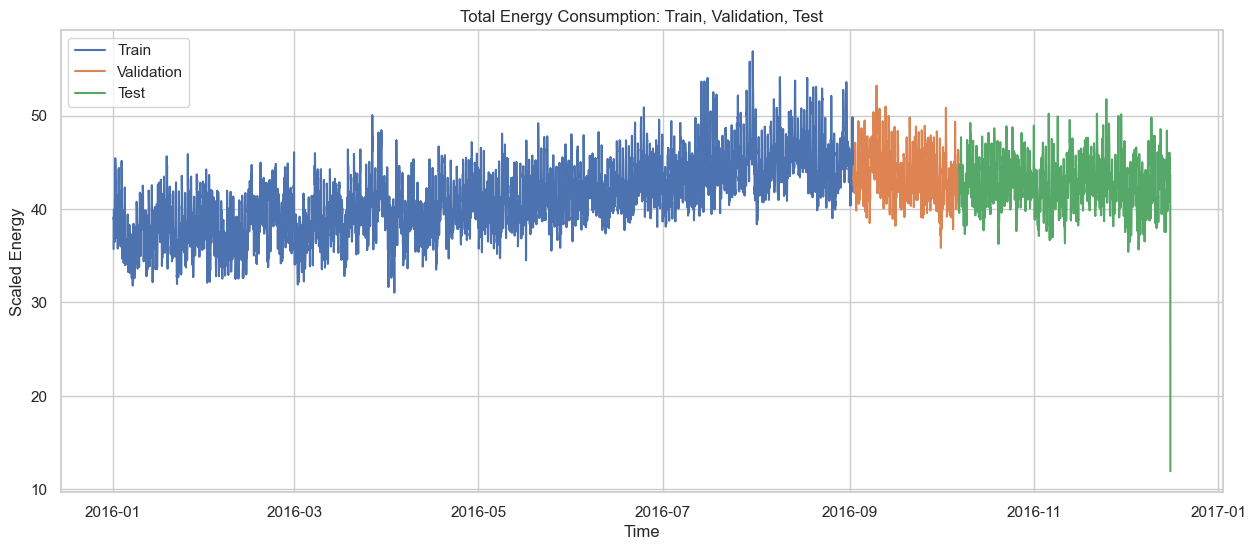

In [24]:
# Add total energy column safely
train = train.copy()
val = val.copy()
test = test.copy()

train['total_energy'] = train.sum(axis=1)
val['total_energy'] = val.sum(axis=1)
test['total_energy'] = test.sum(axis=1)

# Ensure datetime index
train.index = pd.to_datetime(train.index)
val.index = pd.to_datetime(val.index)
test.index = pd.to_datetime(test.index)

# Plot energy consumption
plt.figure(figsize=(15,6))
plt.plot(train.index, train['total_energy'], label='Train')
plt.plot(val.index, val['total_energy'], label='Validation')
plt.plot(test.index, test['total_energy'], label='Test')
plt.title("Total Energy Consumption: Train, Validation, Test")
plt.xlabel("Time")
plt.ylabel("Scaled Energy")
plt.legend()
plt.show()

In [25]:
print(" Week 2: Data Cleaning and Preprocessing completed successfully!\n")

print(" Sample Train Data:")
display(train.head())

print("\n Sample Validation Data:")
display(val.head())

print("\n Sample Test Data:")
display(test.head())

 Week 2: Data Cleaning and Preprocessing completed successfully!

 Sample Train Data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw,total_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.000000,0.109063,0.827692,0.166563,0.516324,0.914335,0.757659,0.929848,0.846968,0.536605,...,0.015110,0.000000,0.031448,0.212052,0.000000,0.719462,0.048228,0.032185,0.000000,35.722975
2016-01-01 06:00:00,0.000119,0.170010,0.392642,0.332683,0.913071,0.885610,0.759684,0.911464,0.819603,0.617993,...,0.015670,0.136532,0.712814,0.206983,0.201355,0.719462,0.174749,0.282042,0.181368,39.145949
2016-01-01 07:00:00,0.000238,0.072869,0.393756,0.261947,0.058624,0.949444,0.747102,0.903723,0.829710,0.625573,...,0.015801,0.306013,0.900405,0.200189,0.222822,0.719462,0.648974,0.287032,0.330627,38.826716
2016-01-01 08:00:00,0.000357,0.237150,0.590010,0.266033,0.057483,0.896879,0.743038,0.909529,0.839531,0.629762,...,0.015797,0.442106,0.879475,0.199822,0.239190,0.719462,0.127184,0.389074,0.492522,39.953594
2016-01-01 09:00:00,0.000476,0.103346,0.393533,0.154409,0.058285,0.937387,0.736070,0.907594,0.833905,0.640933,...,0.015756,0.528303,0.308722,0.203469,0.281963,0.719462,0.027182,0.886358,0.701736,38.451742



 Sample Validation Data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw,total_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-02 04:00:00,0.700131,0.005249,0.407631,0.407420,0.204612,0.924265,0.718342,0.883404,0.744184,0.650708,...,0.013423,0.922946,0.272457,0.749477,0.337361,0.877714,0.062201,0.414240,0.431603,42.548888
2016-09-02 05:00:00,0.700250,0.004294,0.407918,0.190106,0.625513,0.928087,0.724008,0.883404,0.745805,0.684620,...,0.013400,0.941557,0.275312,0.775206,0.349055,0.861979,0.014289,0.524588,0.456027,43.489523
2016-09-02 06:00:00,0.700369,0.003817,0.407378,0.252075,0.359875,0.929112,0.723995,0.886307,0.745519,0.666068,...,0.013334,0.943208,0.709400,0.787123,0.339041,0.875287,0.119969,0.460229,0.443888,43.406927
2016-09-02 07:00:00,0.700488,0.005726,0.407035,0.309742,0.387746,0.924501,0.720869,0.885339,0.745328,0.674446,...,0.013211,0.885257,0.936605,0.791984,0.228296,0.905813,0.730217,0.394513,0.449487,44.607268
2016-09-02 08:00:00,0.700607,0.005726,0.407070,0.134295,0.596453,0.921073,0.724308,0.836475,0.724256,0.590465,...,0.014103,0.835368,0.960420,0.769134,0.312130,0.900013,0.127739,0.416220,0.548755,43.271177



 Sample Test Data:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw,total_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 04:00:00,0.800167,0.600953,0.580835,0.379549,0.065896,0.933525,0.778258,0.901788,0.460336,0.664472,...,0.020174,0.898752,0.239751,0.548928,0.251779,0.869352,0.046028,0.168973,0.370193,39.763689
2016-10-07 05:00:00,0.800286,0.451906,0.574065,0.068328,0.066532,0.950705,0.771094,0.786644,0.467582,0.573509,...,0.020197,0.913233,0.324830,0.595828,0.261562,0.862114,0.163757,0.273062,0.359916,39.577322
2016-10-07 06:00:00,0.800405,0.451906,0.584275,0.293888,0.066814,0.953700,0.772983,0.814705,0.470252,0.574506,...,0.020223,0.912423,0.773724,0.657462,0.283980,0.830508,0.104243,0.316959,0.395363,41.583629
2016-10-07 07:00:00,0.800524,0.454763,0.591186,0.313474,0.066382,0.956143,0.775419,0.817607,0.471396,0.570716,...,0.020194,0.837163,0.866862,0.712110,0.306802,0.865800,0.736939,0.498347,0.466410,44.081731
2016-10-07 08:00:00,0.800643,0.437620,0.577250,0.027170,0.774670,0.944795,0.794123,0.907110,0.469775,0.669659,...,0.020133,0.775555,0.871529,0.762935,0.334360,0.847952,0.082266,0.495775,0.538575,44.771342


In [26]:
# Save Module 2 outputs for future modules
import pickle
import json
# Save train, validation, and test sets
train.to_csv('train_data.csv')
val.to_csv('val_data.csv')
test.to_csv('test_data.csv')
print("Train, Validation, Test datasets saved!")
# Save scaler for future inverse-transform or scaling new data
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved successfully!")
# Save energy columns (already available from Module 1)
with open('energy_columns.json', 'w') as f:
    json.dump(list(df_hourly.columns), f)
print("Energy columns saved!")
print("Module 2 outputs are ready for future use")

Train, Validation, Test datasets saved!
Scaler saved successfully!
Energy columns saved!
Module 2 outputs are ready for future use


In [2]:
# Module 2 Loader
import pandas as pd
import pickle
import json

# Load train, validation, and test sets
train = pd.read_csv('train_data.csv', index_col=0, parse_dates=True)
val   = pd.read_csv('val_data.csv', index_col=0, parse_dates=True)
test  = pd.read_csv('test_data.csv', index_col=0, parse_dates=True)

print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)

# Load scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
print("Scaler loaded successfully!")

# Load energy columns
with open('energy_columns.json', 'r') as f:
    energy_columns = json.load(f)
print("Energy columns loaded:", energy_columns)

Train shape: (5879, 40)
Validation shape: (840, 40)
Test shape: (1680, 40)
Scaler loaded successfully!
Energy columns loaded: ['unnamed 0', 'dishwasher', 'home office', 'fridge', 'wine cellar', 'garage door', 'barn', 'well', 'microwave', 'living room', 'temperature', 'humidity', 'visibility', 'apparenttemperature', 'pressure', 'windspeed', 'cloudcover', 'windbearing', 'precipintensity', 'dewpoint', 'precipprobability', 'furnace', 'kitchen', 'year', 'month', 'day', 'weekofyear', 'hour', 'minute', 'useho', 'gensol', 'car charger kw', 'water heater kw', 'air conditioning kw', 'home theater kw', 'outdoor lights kw', 'microwave kw', 'laundry kw', 'pool pump kw']


#  Module 3: Feature Engineering
## Smart Home Energy Consumption Analysis

### Objective:

1. Extracting time-based features (hour, day, day of week, week, month)
2. Aggregating device-level energy statistics
3. Creating lag features and moving averages for time-series analysis
4. Preparing the final feature set ready for machine learning models


# Prepare Data for Feature Engineering
- Create a copy of the hourly dataset to avoid modifying the original
- Ensure the index is in datetime format
- Ready the dataset for time-based, lag, and rolling features


In [27]:
# Prepare Data for Feature Engineering

# Copy the cleaned hourly dataset to avoid modifying original
df_features = df_hourly.copy()

# Ensure the index is in proper datetime format
df_features.index = pd.to_datetime(df_features.index)

# Check for duplicate timestamps
if df_features.index.duplicated().any():
    print(" Warning: Duplicate timestamps found!")

# Confirm preparation
print(" Week 3: Feature engineering started.")
display(df_features.head())

 Week 3: Feature engineering started.


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,useho,gensol,car charger kw,water heater kw,air conditioning kw,home theater kw,outdoor lights kw,microwave kw,laundry kw,pool pump kw
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.000000,0.109063,0.827692,0.166563,0.516324,0.914335,0.757659,0.929848,0.846968,0.536605,...,0.550104,0.015110,0.000000,0.031448,0.212052,0.000000,0.719462,0.048228,0.032185,0.000000
2016-01-01 06:00:00,0.000119,0.170010,0.392642,0.332683,0.913071,0.885610,0.759684,0.911464,0.819603,0.617993,...,0.489700,0.015670,0.136532,0.712814,0.206983,0.201355,0.719462,0.174749,0.282042,0.181368
2016-01-01 07:00:00,0.000238,0.072869,0.393756,0.261947,0.058624,0.949444,0.747102,0.903723,0.829710,0.625573,...,0.381106,0.015801,0.306013,0.900405,0.200189,0.222822,0.719462,0.648974,0.287032,0.330627
2016-01-01 08:00:00,0.000357,0.237150,0.590010,0.266033,0.057483,0.896879,0.743038,0.909529,0.839531,0.629762,...,0.512038,0.015797,0.442106,0.879475,0.199822,0.239190,0.719462,0.127184,0.389074,0.492522
2016-01-01 09:00:00,0.000476,0.103346,0.393533,0.154409,0.058285,0.937387,0.736070,0.907594,0.833905,0.640933,...,0.341124,0.015756,0.528303,0.308722,0.203469,0.281963,0.719462,0.027182,0.886358,0.701736


# Extract Time-Based Features
- Extract hour, day, day of week, week number, and month from the datetime index
- Helps the model capture daily, weekly, and monthly energy consumption patterns


In [28]:
#  Ensure index is datetime (safe check)
df_features.index = pd.to_datetime(df_features.index)

# Extract time-based features
df_features['hour'] = df_features.index.hour
df_features['day'] = df_features.index.day
df_features['day_of_week'] = df_features.index.dayofweek  # 0=Monday, 6=Sunday
df_features['week'] = df_features.index.isocalendar().week.astype(int)
df_features['month'] = df_features.index.month

# Confirm addition of features
print(" Time-based features added successfully.")
display(df_features[['hour', 'day', 'day_of_week', 'week', 'month']].head())

 Time-based features added successfully.


,hour,day,day_of_week,week,month
timestamp,,,,,
2016-01-01 05:00:00,5,1,4,53,1
2016-01-01 06:00:00,6,1,4,53,1
2016-01-01 07:00:00,7,1,4,53,1
2016-01-01 08:00:00,8,1,4,53,1
2016-01-01 09:00:00,9,1,4,53,1


# Aggregate Device Energy
- Identify device columns (exclude time-based features)
- Compute total, average, and maximum energy usage for each timestamp
- Helps understand overall and device-level consumption patterns


In [29]:
# Strip column names to avoid hidden whitespace issues
df_features.columns = df_features.columns.str.strip()

# Identify device columns by excluding time-based features
time_cols = ['hour', 'day', 'day_of_week', 'week', 'month']
device_columns = [col for col in df_features.columns if col not in time_cols]

if len(device_columns) == 0:
    raise ValueError(" No device columns found! Check your column names.")

# Aggregate statistics for device energy
df_features['total_energy'] = df_features[device_columns].sum(axis=1)
df_features['avg_energy'] = df_features[device_columns].mean(axis=1)
df_features['max_energy'] = df_features[device_columns].max(axis=1)

# Confirm aggregation
print(" Device-level energy features created successfully.")
display(df_features[['total_energy', 'avg_energy', 'max_energy']].head())

 Device-level energy features created successfully.


,total_energy,avg_energy,max_energy
timestamp,,,
2016-01-01 05:00:00,17.644096,0.490114,1.0
2016-01-01 06:00:00,19.312105,0.536447,1.0
2016-01-01 07:00:00,19.109010,0.530806,1.0
2016-01-01 08:00:00,19.628971,0.545249,1.0
2016-01-01 09:00:00,18.834567,0.523182,1.0


# Visualize Total Energy Over Time
- Plot total energy consumption across all devices
- Helps understand overall household energy usage trends


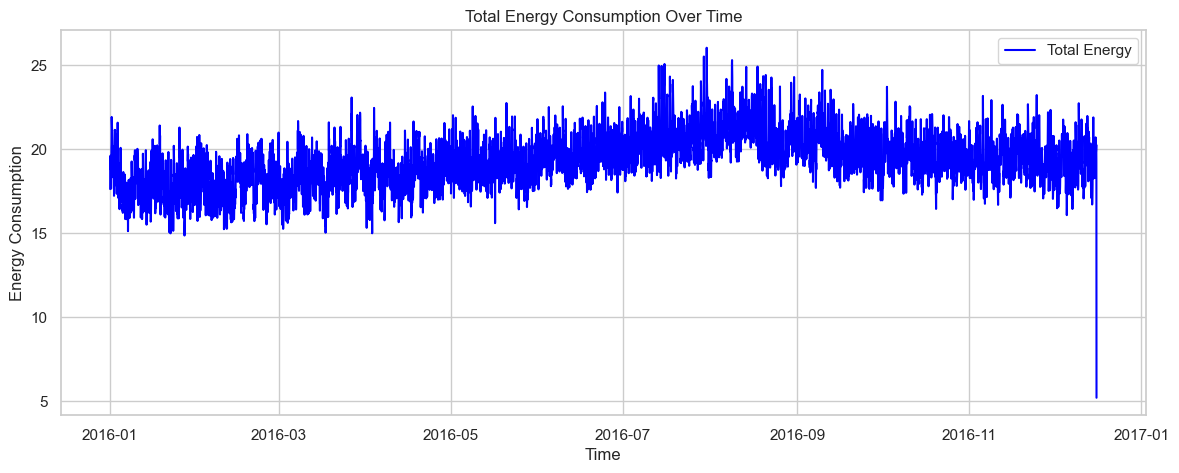

In [30]:
#  Plot total energy over time
plt.figure(figsize=(14,5))
plt.plot(df_features.index, df_features['total_energy'], color='blue', label='Total Energy')
plt.title("Total Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

# Create Lag Features
- Use past energy values to help predict future usage
- Lag-1: Previous hour's energy
- Lag-24: Previous day's energy
- Lag-168: Previous week's energy
- Captures hourly, daily, and weekly energy patterns


In [31]:
# Lag features for each device
for col in device_columns:
    df_features[f'{col}_lag_1'] = df_features[col].shift(1)      # Previous hour
    df_features[f'{col}_lag_24'] = df_features[col].shift(24)    # Previous day

# Lag features for total energy
df_features['lag_1'] = df_features['total_energy'].shift(1)       # Previous hour
df_features['lag_24'] = df_features['total_energy'].shift(24)     # Previous day
df_features['lag_168'] = df_features['total_energy'].shift(168)   # Previous week

# Confirm lag features
print("Lag features added successfully.")

# Display first 30 rows to check
display(df_features[['total_energy','lag_1','lag_24','lag_168']].head(30))

Lag features added successfully.


,total_energy,lag_1,lag_24,lag_168
timestamp,,,,
2016-01-01 05:00:00,17.644096,NaN,NaN,NaN
2016-01-01 06:00:00,19.312105,17.644096,NaN,NaN
2016-01-01 07:00:00,19.109010,19.312105,NaN,NaN
2016-01-01 08:00:00,19.628971,19.109010,NaN,NaN
2016-01-01 09:00:00,18.834567,19.628971,NaN,NaN
2016-01-01 10:00:00,18.938563,18.834567,NaN,NaN
2016-01-01 11:00:00,18.793931,18.938563,NaN,NaN
2016-01-01 12:00:00,19.194683,18.793931,NaN,NaN
2016-01-01 13:00:00,17.669643,19.194683,NaN,NaN


# Create Moving Averages
- Smooth out short-term fluctuations in energy usage
- ma_3: Average over last 3 hours
- ma_24: Average over last 24 hours
- ma_168: Average over last week (168 hours)
- Highlights overall energy trends instead of sudden spikes


In [32]:
# Ensure total_energy is numeric
df_features['total_energy'] = pd.to_numeric(df_features['total_energy'], errors='coerce')

# Create moving averages for total energy
df_features['ma_3'] = df_features['total_energy'].rolling(window=3, min_periods=1).mean()   # Last 3 hours
df_features['ma_24'] = df_features['total_energy'].rolling(window=24, min_periods=1).mean() # Last 24 hours
df_features['ma_168'] = df_features['total_energy'].rolling(window=168, min_periods=1).mean() # Last week

# Confirm moving average features
print(" Moving average features created successfully.")
display(df_features[['ma_3','ma_24','ma_168']].head(30))

 Moving average features created successfully.


,ma_3,ma_24,ma_168
timestamp,,,
2016-01-01 05:00:00,17.644096,17.644096,17.644096
2016-01-01 06:00:00,18.478101,18.478101,18.478101
2016-01-01 07:00:00,18.688404,18.688404,18.688404
2016-01-01 08:00:00,19.350029,18.923545,18.923545
2016-01-01 09:00:00,19.190849,18.905750,18.905750
2016-01-01 10:00:00,19.134034,18.911219,18.911219
2016-01-01 11:00:00,18.855687,18.894463,18.894463
2016-01-01 12:00:00,18.975726,18.931991,18.931991
2016-01-01 13:00:00,18.552752,18.791730,18.791730


# Plot Moving Average vs Actual Energy
- Compare actual total energy with 24-hour moving average
- Helps visualize trend smoothing and reduce short-term fluctuations


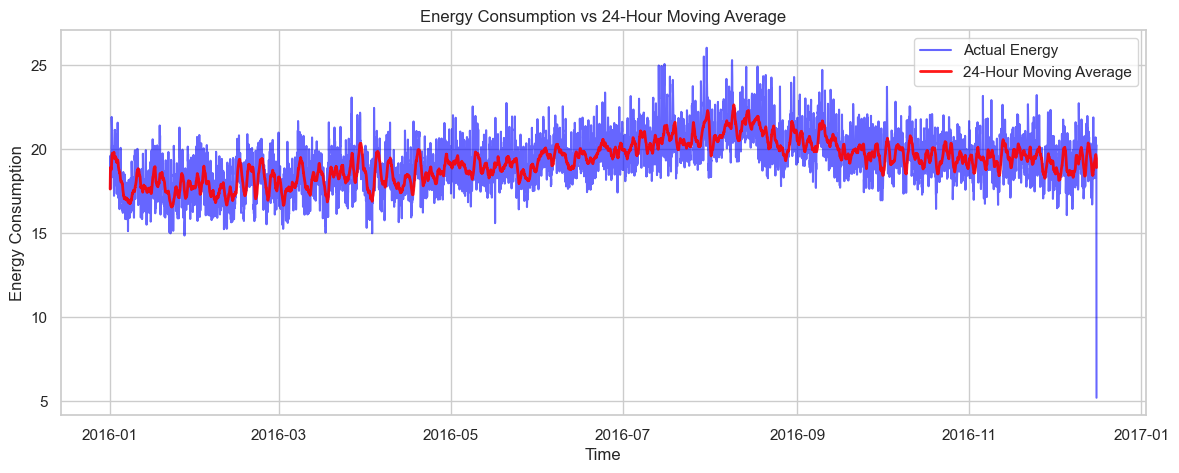

In [33]:
#  Plot actual energy vs 24-hour moving average
# Ensure datetime index
df_features.index = pd.to_datetime(df_features.index)

plt.figure(figsize=(14,5))
plt.plot(df_features.index, df_features['total_energy'], label='Actual Energy', alpha=0.6, color='blue')
plt.plot(df_features.index, df_features['ma_24'], label='24-Hour Moving Average', linewidth=2, alpha=0.9, color='red')

plt.title("Energy Consumption vs 24-Hour Moving Average")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

# Remove Missing Values for Lag and Rolling Features
- Lag and moving average features create NaN values at the start
- Drop these rows to prepare a clean dataset
- Dataset is now ready for machine learning modeling


In [34]:
# Check number of missing values before dropping
missing_before = df_features.isnull().sum().sum()
print(f"Total missing values before dropping: {missing_before}")

# Drop all rows with any NaN values
df_features_clean = df_features.dropna().copy()

# Confirm removal of missing values and check dataset shape
missing_after = df_features_clean.isnull().sum().sum()
print(f"Total missing values after dropping: {missing_after}")
print(" Missing values removed successfully.")
print("Final dataset shape:", df_features_clean.shape)

# Preview the cleaned dataset
print("Cleaned dataset ready for ML modeling:")
display(df_features_clean.head())

Total missing values before dropping: 1093
Total missing values after dropping: 0
 Missing values removed successfully.
Final dataset shape: (8231, 122)
Cleaned dataset ready for ML modeling:


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,laundry kw_lag_1,laundry kw_lag_24,pool pump kw_lag_1,pool pump kw_lag_24,lag_1,lag_24,lag_168,ma_3,ma_24,ma_168
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-08 05:00:00,0.020007,0.125241,0.462022,0.539297,0.765369,0.897707,0.662451,0.893564,0.831236,0.584680,...,0.476078,0.208433,0.431729,0.378019,16.863924,15.908750,17.644096,16.553635,16.844302,18.171052
2016-01-08 06:00:00,0.020126,0.081432,0.457764,0.538744,0.056831,0.922137,0.661148,0.894047,0.811594,0.621185,...,0.448984,0.278953,0.467438,0.412350,16.868237,15.837834,19.312105,16.643409,16.859311,18.152516
2016-01-08 07:00:00,0.020245,0.229997,0.462858,0.538124,0.055093,0.856923,0.666840,0.901304,0.810355,0.619389,...,0.139542,0.280847,0.470820,0.400280,16.198065,17.744978,19.109010,16.949791,16.860898,18.144624
2016-01-08 08:00:00,0.020364,0.123338,0.497701,0.539212,0.055947,0.897470,0.675372,0.896466,0.817601,0.623379,...,0.398679,0.404691,0.450691,0.481413,17.783071,17.316785,19.628971,16.869917,16.832225,18.126765
2016-01-08 09:00:00,0.020484,0.065240,0.461704,0.539890,0.056024,0.893018,0.652109,0.895015,0.763349,0.611809,...,0.355820,0.677173,0.525809,0.627452,16.628615,17.268978,18.834567,17.055891,16.810850,18.114392


In [35]:
# Feature Correlation Check 
# Check correlation of all features with total_energy
corr = df_features_clean.select_dtypes(include='number').corr()['total_energy'].sort_values(ascending=False)
print("Correlation of features with total energy:\n")
for feature, value in corr.items():
    print(f"{feature:20s}: {value:.4f}")

Correlation of features with total energy:

total_energy        : 1.0000
avg_energy          : 1.0000
ma_3                : 0.9163
lag_1               : 0.8419
ma_24               : 0.7114
lag_24              : 0.6798
ma_168              : 0.6476
lag_168             : 0.6102
dewpoint_lag_1      : 0.6077
dewpoint            : 0.6056
air conditioning kw : 0.5675
temperature         : 0.5662
air conditioning kw_lag_1: 0.5633
temperature_lag_1   : 0.5619
apparenttemperature : 0.5588
apparenttemperature_lag_1: 0.5566
dewpoint_lag_24     : 0.5334
apparenttemperature_lag_24: 0.5197
air conditioning kw_lag_24: 0.5173
temperature_lag_24  : 0.5130
wine cellar         : 0.5078
weekofyear          : 0.4408
unnamed 0           : 0.4404
weekofyear_lag_1    : 0.4387
week                : 0.4387
unnamed 0_lag_1     : 0.4383
unnamed 0_lag_24    : 0.4383
weekofyear_lag_24   : 0.4376
month               : 0.4352
wine cellar_lag_1   : 0.3597
wine cellar_lag_24  : 0.3514
home theater kw     : 0.3428
home t

# Prepare Final Feature Set for Machine Learning
- Separate input features (X) and target variable (y)
- Dataset is now ready for machine learning models


In [36]:
# Define target variable
y = df_features_clean['total_energy']   # Target is total energy consumption

# Define input features
X = df_features_clean.drop(columns=['total_energy'])  # All other columns as features

# Confirm shapes of features and target
print("Final feature set ready for ML models.")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Preview the first few rows of input features
display(X.head())

Final feature set ready for ML models.
Features (X) shape: (8231, 121)
Target (y) shape: (8231,)


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,laundry kw_lag_1,laundry kw_lag_24,pool pump kw_lag_1,pool pump kw_lag_24,lag_1,lag_24,lag_168,ma_3,ma_24,ma_168
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-08 05:00:00,0.020007,0.125241,0.462022,0.539297,0.765369,0.897707,0.662451,0.893564,0.831236,0.584680,...,0.476078,0.208433,0.431729,0.378019,16.863924,15.908750,17.644096,16.553635,16.844302,18.171052
2016-01-08 06:00:00,0.020126,0.081432,0.457764,0.538744,0.056831,0.922137,0.661148,0.894047,0.811594,0.621185,...,0.448984,0.278953,0.467438,0.412350,16.868237,15.837834,19.312105,16.643409,16.859311,18.152516
2016-01-08 07:00:00,0.020245,0.229997,0.462858,0.538124,0.055093,0.856923,0.666840,0.901304,0.810355,0.619389,...,0.139542,0.280847,0.470820,0.400280,16.198065,17.744978,19.109010,16.949791,16.860898,18.144624
2016-01-08 08:00:00,0.020364,0.123338,0.497701,0.539212,0.055947,0.897470,0.675372,0.896466,0.817601,0.623379,...,0.398679,0.404691,0.450691,0.481413,17.783071,17.316785,19.628971,16.869917,16.832225,18.126765
2016-01-08 09:00:00,0.020484,0.065240,0.461704,0.539890,0.056024,0.893018,0.652109,0.895015,0.763349,0.611809,...,0.355820,0.677173,0.525809,0.627452,16.628615,17.268978,18.834567,17.055891,16.810850,18.114392


In [37]:
# Save Feature Set and Target for Modeling

from sklearn.preprocessing import MinMaxScaler

# Scale features (important for LSTM)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Save features and target to CSV for Week 4–5 modeling
X_scaled.to_csv('X_features.csv')
y.to_csv('y_target.csv', index=True)  # keep timestamp index

# Confirmation
print(" Feature set (X_scaled) and target (y) saved successfully!")
display(X_scaled.head())
display(y.head())

 Feature set (X_scaled) and target (y) saved successfully!


,unnamed 0,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,...,laundry kw_lag_1,laundry kw_lag_24,pool pump kw_lag_1,pool pump kw_lag_24,lag_1,lag_24,lag_168,ma_3,ma_24,ma_168
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-08 05:00:00,0.000000,0.125241,0.462022,0.539297,0.765369,0.897707,0.662451,0.893564,0.831236,0.584680,...,0.476078,0.208433,0.248745,0.177741,0.177676,0.092232,0.247466,0.151850,0.045116,0.200457
2016-01-08 06:00:00,0.000122,0.081432,0.457764,0.538744,0.056831,0.922137,0.661148,0.894047,0.811594,0.621185,...,0.448984,0.278953,0.295953,0.223126,0.178062,0.085888,0.396676,0.160273,0.047582,0.196264
2016-01-08 07:00:00,0.000243,0.229997,0.462858,0.538124,0.055093,0.856923,0.666840,0.901304,0.810355,0.619389,...,0.139542,0.280847,0.300424,0.207170,0.118113,0.256490,0.378508,0.189020,0.047842,0.194479
2016-01-08 08:00:00,0.000365,0.123338,0.497701,0.539212,0.055947,0.897470,0.675372,0.896466,0.817601,0.623379,...,0.398679,0.404691,0.273813,0.314428,0.259898,0.218187,0.425021,0.181526,0.043132,0.190440
2016-01-08 09:00:00,0.000486,0.065240,0.461704,0.539890,0.056024,0.893018,0.652109,0.895015,0.763349,0.611809,...,0.355820,0.677173,0.373120,0.507491,0.156627,0.213910,0.353958,0.198975,0.039620,0.187641


timestamp
2016-01-08 05:00:00    16.868237
2016-01-08 06:00:00    16.198065
2016-01-08 07:00:00    17.783071
2016-01-08 08:00:00    16.628615
2016-01-08 09:00:00    16.755988
Freq: h, Name: total_energy, dtype: float64

In [39]:
# Module 3: Save Outputs for Future Modules
# Save cleaned & feature-engineered dataset
df_features_clean.to_csv('df_features_clean.csv', index=True)
print(" Cleaned feature-engineered dataset saved as 'df_features_clean.csv'")
# Save scaled feature set and target (for modeling)
X_scaled.to_csv('X_features.csv', index=True)
y.to_csv('y_target.csv', index=True)
print(" Scaled features saved as 'X_features.csv' and target saved as 'y_target.csv'")
# Save scaler object (important for LSTM predictions and Flask integration)
import pickle
with open('scaler_module3.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print(" Scaler object saved as 'scaler_module3.pkl'")
# Save device/feature columns (to ensure consistent feature order for modeling and API)
import json
device_cols = [col for col in X.columns]
with open('module3_device_columns.json', 'w') as f:
    json.dump(device_cols, f)
print(" Device/feature columns saved as 'module3_device_columns.json'")

 Cleaned feature-engineered dataset saved as 'df_features_clean.csv'
 Scaled features saved as 'X_features.csv' and target saved as 'y_target.csv'
 Scaler object saved as 'scaler_module3.pkl'
 Device/feature columns saved as 'module3_device_columns.json'


In [3]:
# Module 3 Loader
import pandas as pd
import pickle
import json

# Load cleaned & feature-engineered dataset
df_features_clean = pd.read_csv('df_features_clean.csv', index_col=0, parse_dates=True)
print("Loaded cleaned feature dataset. Shape:", df_features_clean.shape)

# Load scaled features and target
X_scaled = pd.read_csv('X_features.csv', index_col=0)
y = pd.read_csv('y_target.csv', index_col=0)
print("Loaded scaled features X_scaled:", X_scaled.shape)
print("Loaded target y:", y.shape)

# Load scaler object (important for LSTM and Flask API)
with open('scaler_module3.pkl', 'rb') as f:
    scaler = pickle.load(f)
print("Scaler object loaded successfully!")

# Load device/feature columns (to maintain consistent feature order)
with open('module3_device_columns.json', 'r') as f:
    device_cols = json.load(f)
print("Device/feature columns loaded:", device_cols)

Loaded cleaned feature dataset. Shape: (8231, 122)
Loaded scaled features X_scaled: (8231, 121)
Loaded target y: (8231, 1)
Scaler object loaded successfully!
Device/feature columns loaded: ['unnamed 0', 'dishwasher', 'home office', 'fridge', 'wine cellar', 'garage door', 'barn', 'well', 'microwave', 'living room', 'temperature', 'humidity', 'visibility', 'apparenttemperature', 'pressure', 'windspeed', 'cloudcover', 'windbearing', 'precipintensity', 'dewpoint', 'precipprobability', 'furnace', 'kitchen', 'year', 'month', 'day', 'weekofyear', 'hour', 'minute', 'useho', 'gensol', 'car charger kw', 'water heater kw', 'air conditioning kw', 'home theater kw', 'outdoor lights kw', 'microwave kw', 'laundry kw', 'pool pump kw', 'day_of_week', 'week', 'avg_energy', 'max_energy', 'unnamed 0_lag_1', 'unnamed 0_lag_24', 'dishwasher_lag_1', 'dishwasher_lag_24', 'home office_lag_1', 'home office_lag_24', 'fridge_lag_1', 'fridge_lag_24', 'wine cellar_lag_1', 'wine cellar_lag_24', 'garage door_lag_1', 

# Module 4: Baseline Model Development
## Smart Home Energy Consumption Analysis

### Objective:
- Implement a simple Linear Regression model as a baseline for energy forecasting.
- Train and evaluate the model using MAE and RMSE.
- Visualize actual vs predicted energy consumption.
- Use this baseline as a reference for model comparision.

### Import Libraries and Load Data

* Import required libraries for data processing and modeling.
* Convert the **time** column to datetime and set it as the index.
* Handle missing values to ensure a clean time-series dataset.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

# Load CSV
df = pd.read_csv("HomeC_augmented.csv")
print("Columns in CSV:")
print(df.columns)

# Convert 'time' column to datetime and set as index
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df[df['time'].notna()]
df = df.set_index('time').sort_index()

# Fill missing values
df = df.interpolate(method='time').bfill().ffill()

Columns in CSV:
Index(['Unnamed: 0', 'time', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen', 'year', 'month', 'day', 'weekday', 'weekofyear',
       'hour', 'minute', 'timing', 'use_HO', 'gen_Sol', 'Car charger [kW]',
       'Water heater [kW]', 'Air conditioning [kW]', 'Home Theater [kW]',
       'Outdoor lights [kW]', 'microwave [kW]', 'Laundry [kW]',
       'Pool Pump [kW]'],
      dtype='object')


### Target & Device Features

* Select appliance columns that record energy usage in kilowatts (kW).
* Compute **total_energy** by summing all appliance energy values.
* Verify the target variable by inspecting the initial rows.

In [42]:
# Target & Device Features
# Select appliance columns that contain 'kW'
device_cols = [c for c in df.columns if 'kw' in c.lower()]
print("\nAppliance columns used for total_energy:")
print(device_cols)

# Sum appliance columns to create total_energy
df['total_energy'] = df[device_cols].sum(axis=1)
print("\ntotal_energy created successfully.")
# Display first few rows
display(df.head())


Appliance columns used for total_energy:
['Car charger [kW]', 'Water heater [kW]', 'Air conditioning [kW]', 'Home Theater [kW]', 'Outdoor lights [kW]', 'microwave [kW]', 'Laundry [kW]', 'Pool Pump [kW]']

total_energy created successfully.


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW],total_energy
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746,0.049883
2016-01-01 05:01:00,1,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249,0.071730
2016-01-01 05:02:00,2,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971,0.050893
2016-01-01 05:03:00,3,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673,0.083329
2016-01-01 05:04:00,4,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006,0.070608


### Time Features

* Extract key time attributes (hour, day, month, day of week) from the datetime index.
* One-hot encode the day of week to capture daily usage patterns.
* Add a weekend indicator to distinguish weekday and weekend behavior.

In [43]:
# Time Features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

# One-hot encode day_of_week
dow_onehot = pd.get_dummies(df['day_of_week'], prefix='dow')
df = pd.concat([df, dow_onehot], axis=1)

# Weekend flag
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

display(df[['hour','day','month','day_of_week','is_weekend']].head())

,hour,day,month,day_of_week,is_weekend
time,,,,,
2016-01-01 05:00:00,5,1,1,4,0
2016-01-01 05:01:00,5,1,1,4,0
2016-01-01 05:02:00,5,1,1,4,0
2016-01-01 05:03:00,5,1,1,4,0
2016-01-01 05:04:00,5,1,1,4,0


### Lag & Rolling Features

* Add lag features to capture previous energy usage patterns.
* Use rolling averages to smooth short-term variations and represent trends.
* Remove rows with missing values created by these operations to keep the dataset clean.

In [44]:
# Lag & Rolling Features
df['lag_1'] = df['total_energy'].shift(1)       # previous hour
df['lag_24'] = df['total_energy'].shift(24)     # same hour yesterday
df['ma_3'] = df['total_energy'].rolling(3, min_periods=1).mean()   # short-term trend
df['ma_24'] = df['total_energy'].rolling(24, min_periods=1).mean() # daily trend

# Drop rows with NaN from lags
df = df.dropna()
print(f"Dataset shape after creating lag/rolling features: {df.shape}")

Dataset shape after creating lag/rolling features: (503886, 55)


### Prepare Final Feature Set

* Select the required input features for model training.
* Set `total_energy` as the target variable to be predicted.
* Preview the features and target to confirm the dataset is ready for modeling.

In [45]:
# Features for Baseline Model
feature_cols = ['hour','day','month','is_weekend','lag_1','lag_24','ma_3','ma_24'] + list(dow_onehot.columns)
X = df[feature_cols]
y = df['total_energy']

print("\nFeature set preview:")
display(X.head())
print("\nTarget preview:")
display(y.head())


Feature set preview:


,hour,day,month,is_weekend,lag_1,lag_24,ma_3,ma_24,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
time,,,,,,,,,,,,,,,
2016-01-01 05:24:00,5,1,1,0,1.455100,0.049883,1.499626,0.328431,False,False,False,False,True,False,False
2016-01-01 05:25:00,5,1,1,0,1.577620,0.071730,1.527558,0.390024,False,False,False,False,True,False,False
2016-01-01 05:26:00,5,1,1,0,1.549954,0.050893,1.553833,0.451817,False,False,False,False,True,False,False
2016-01-01 05:27:00,5,1,1,0,1.533924,0.083329,1.129986,0.461098,False,False,False,False,True,False,False
2016-01-01 05:28:00,5,1,1,0,0.306079,0.070608,0.718305,0.471277,False,False,False,False,True,False,False



Target preview:


time
2016-01-01 05:24:00    1.577620
2016-01-01 05:25:00    1.549954
2016-01-01 05:26:00    1.533924
2016-01-01 05:27:00    0.306079
2016-01-01 05:28:00    0.314913
Name: total_energy, dtype: float64

### Train-Test Split and Feature Scaling

* Split the data into training and testing sets using an 80–20 time-based split.
* Apply MinMax scaling to normalize feature values for better model performance.
* Confirm the split by checking the number of training and testing samples.

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Train-Test Split
split_idx = int(0.8*len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Scale Features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale Target (important for LSTM)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

Train samples: 403108, Test samples: 100778


### Train Linear Regression Model

* Train a Linear Regression model using the scaled training data.
* Generate predictions on the test set for evaluation.
* This serves as a baseline to assess how well a simple linear model captures energy usage patterns.

In [47]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


### Evaluate Model Performance

* **MAE**: Measures the average absolute error between actual and predicted values.
* **MSE**: Measures the average squared error, giving more weight to larger mistakes.
* **RMSE**: Square root of MSE, expressed in the same units as energy consumption.
* **R²**: Indicates how much of the variation in energy usage is explained by the model.

These metrics together provide a clear and reliable evaluation of the model’s accuracy and performance.

In [48]:
# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nBaseline Linear Regression Evaluation:")
print(f"MAE:  {mae:.6f}")
print(f"MSE:  {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R²:   {r2:.6f}")


Baseline Linear Regression Evaluation:
MAE:  0.155693
MSE:  0.089035
RMSE: 0.298387
R²:   0.871746


### Time-Series Cross-Validation (Training Set)

- 5-fold chronological cross-validation on the training set for the baseline Linear Regression model.
- Features are scaled per fold to prevent data leakage.
- Metrics (MAE, RMSE, R²) are computed for each fold and averaged.

In [49]:
# Time-Series Cross-Validation on TRAINING SET only
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores, r2_scores = [], [], []

for train_idx, val_idx in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = MinMaxScaler().fit(X_tr)
    X_tr_scaled, X_val_scaled = scaler.transform(X_tr), scaler.transform(X_val)

    y_val_pred = LinearRegression().fit(X_tr_scaled, y_tr).predict(X_val_scaled)

    mae_scores.append(mean_absolute_error(y_val, y_val_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    r2_scores.append(r2_score(y_val, y_val_pred))
print(f"Cross-Validation Results (Train Set):")
print(f"MAE:  {np.mean(mae_scores):.6f}")
print(f"RMSE: {np.mean(rmse_scores):.6f}")
print(f"R²:   {np.mean(r2_scores):.6f}")

for i, (mae, rmse, r2) in enumerate(zip(mae_scores, rmse_scores, r2_scores), 1):
    print(f"Fold {i} → MAE: {mae:.6f}, RMSE: {rmse:.6f}, R²: {r2:.6f}")

Cross-Validation Results (Train Set):
MAE:  0.152476
RMSE: 0.293843
R²:   0.873753
Fold 1 → MAE: 0.151448, RMSE: 0.292510, R²: 0.872874
Fold 2 → MAE: 0.152514, RMSE: 0.294802, R²: 0.874030
Fold 3 → MAE: 0.152444, RMSE: 0.293196, R²: 0.872541
Fold 4 → MAE: 0.153253, RMSE: 0.294434, R²: 0.874527
Fold 5 → MAE: 0.152721, RMSE: 0.294273, R²: 0.874793


### Visualize Actual vs Predicted

* Plot actual and predicted energy consumption to compare model performance.
* Close overlap between the lines indicates good predictions.

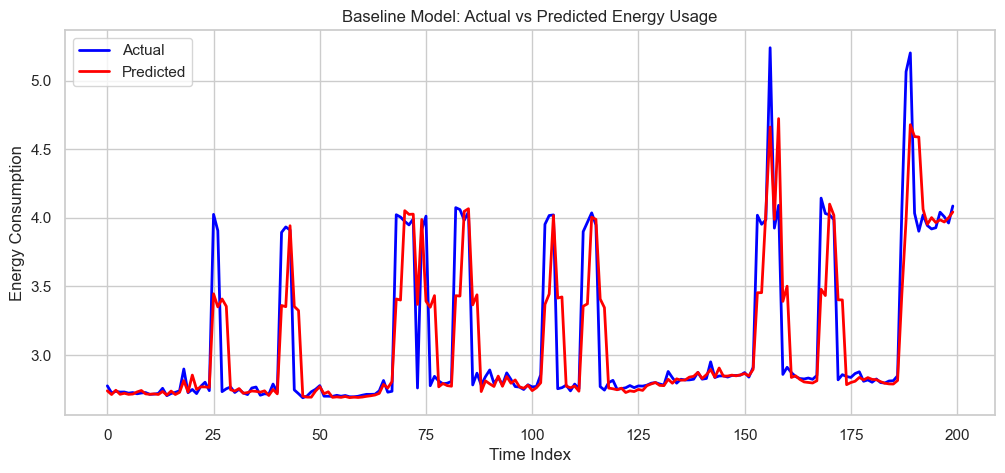

In [50]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label='Actual', color='blue', linewidth=2)
plt.plot(y_pred[:200], label='Predicted', color='red', linewidth=2)
plt.title("Baseline Model: Actual vs Predicted Energy Usage")
plt.xlabel("Time Index")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
import joblib
import json
from pathlib import Path
# Create directory to save all Module 4 outputs
save_dir = Path("saved_module4")
save_dir.mkdir(exist_ok=True)
# 1. Save Linear Regression model
joblib.dump(model, save_dir / "baseline_lr_model.pkl")
print("Linear Regression model saved!")
# 2. Save feature scaler (X)
joblib.dump(scaler_X, save_dir / "scaler_X.pkl")
print("Feature scaler saved!")
# 3. Save target scaler (y, optional but useful for LSTM)
joblib.dump(scaler_y, save_dir / "scaler_y.pkl")
print("Target scaler saved!")
# 4. Save feature column names
with open(save_dir / "feature_cols.json", 'w') as f:
    json.dump(feature_cols, f)
print("Feature columns saved!")
# 5. Save train/test splits
split_dir = save_dir / "splits"
split_dir.mkdir(exist_ok=True)
X_train.to_csv(split_dir / "X_train.csv", index=True)
X_test.to_csv(split_dir / "X_test.csv", index=True)
y_train.to_csv(split_dir / "y_train.csv", index=True)
y_test.to_csv(split_dir / "y_test.csv", index=True)
print("Train/Test splits saved successfully!")
print("\nModule 4 outputs are fully saved and ready for future modules!")

Linear Regression model saved!
Feature scaler saved!
Target scaler saved!
Feature columns saved!
Train/Test splits saved successfully!

Module 4 outputs are fully saved and ready for future modules!


In [4]:
# Module 4 Loader
import joblib
import json
import pandas as pd
from pathlib import Path

# Define save directory
save_dir = Path("saved_module4")
split_dir = save_dir / "splits"

# 1. Load Linear Regression model
baseline_lr_model = joblib.load(save_dir / "baseline_lr_model.pkl")
print("Linear Regression model loaded!")

# 2. Load feature scaler (X)
scaler_X = joblib.load(save_dir / "scaler_X.pkl")
print("Feature scaler loaded!")

# 3. Load target scaler (y, optional for LSTM)
scaler_y = joblib.load(save_dir / "scaler_y.pkl")
print("Target scaler loaded!")

# 4. Load feature columns
with open(save_dir / "feature_cols.json", 'r') as f:
    feature_cols = json.load(f)
print("Feature columns loaded:", feature_cols)

# 5. Load train/test splits
X_train = pd.read_csv(split_dir / "X_train.csv", index_col=0)
X_test  = pd.read_csv(split_dir / "X_test.csv", index_col=0)
y_train = pd.read_csv(split_dir / "y_train.csv", index_col=0)
y_test  = pd.read_csv(split_dir / "y_test.csv", index_col=0)

print("Train/Test splits loaded successfully!")
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)

Linear Regression model loaded!
Feature scaler loaded!
Target scaler loaded!
Feature columns loaded: ['hour', 'day', 'month', 'is_weekend', 'lag_1', 'lag_24', 'ma_3', 'ma_24', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']
Train/Test splits loaded successfully!
X_train shape: (403108, 18)
X_test shape:  (100778, 18)
y_train shape: (403108, 1)
y_test shape:  (100778, 1)


# Module 5: LSTM Time-Series Modeling
## Smart Home Energy Consumption Analysis

### Objective:

- Designing and implementing an LSTM model using TensorFlow/Keras
- Training the model for energy consumption prediction
- Performing basic hyperparameter tuning (batch size, epochs, learning rate)
- Comparing LSTM performance with the baseline Linear Regression model

In [6]:
import joblib
from pathlib import Path

# Load target scaler from Module 4
save_dir = Path("saved_module4")
scaler_y = joblib.load(save_dir / "scaler_y.pkl")
print("Target scaler loaded for inverse transform!")

Target scaler loaded for inverse transform!


In [16]:
# Module 5: LSTM Time-Series Modeling

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import Input
from pathlib import Path
import joblib

# Load splits from Module 4
save_dir = Path("saved_module4")
split_dir = save_dir / "splits"

X_train = pd.read_csv(split_dir / "X_train.csv", index_col=0).apply(pd.to_numeric, errors='coerce').astype(np.float32).values
X_test  = pd.read_csv(split_dir / "X_test.csv", index_col=0).apply(pd.to_numeric, errors='coerce').astype(np.float32).values
y_train = pd.read_csv(split_dir / "y_train.csv", index_col=0).apply(pd.to_numeric, errors='coerce').astype(np.float32).values
y_test  = pd.read_csv(split_dir / "y_test.csv", index_col=0).apply(pd.to_numeric, errors='coerce').astype(np.float32).values

print("Data loaded for LSTM training.")
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

# Reshape features for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train_lstm dtype:", X_train_lstm.dtype)
print("y_train dtype:", y_train.dtype)
print("Reshaped for LSTM:")
print("X_train_lstm:", X_train_lstm.shape)
print("X_test_lstm:", X_test_lstm.shape)

# Build LSTM model
def build_lstm(units=64, dropout=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Train baseline LSTM
lstm_model = build_lstm(units=64, dropout=0.3, learning_rate=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predictions & Metrics
y_pred = lstm_model.predict(X_test_lstm)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("LSTM (Single Split) Performance:")
print("MAE:", mae, "RMSE:", rmse, "R²:", r2)

# Inverse transform to original units
scaler_y = joblib.load(save_dir / "scaler_y.pkl")
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2   = r2_score(y_test_inv, y_pred_inv)

print("LSTM (Single Split) Performance (original units):")
print("MAE:", mae, "RMSE:", rmse, "R²:", r2)

# -----------------------------
# Save baseline model and metrics
# -----------------------------
save_dir = Path("saved_module5")
save_dir.mkdir(exist_ok=True)

lstm_model.save(save_dir / "baseline_lstm_model.h5")
joblib.dump({
    "mae": mae,
    "rmse": rmse,
    "r2": r2
}, save_dir / "baseline_metrics.pkl")

print(" Baseline LSTM model and metrics saved successfully!")

Data loaded for LSTM training.
X_train shape: (403108, 18) y_train shape: (403108, 1)
X_train_lstm dtype: float32
y_train dtype: float32
Reshaped for LSTM:
X_train_lstm: (403108, 1, 18)
X_test_lstm: (100778, 1, 18)
Epoch 1/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 0.0735 - val_loss: 0.0071
Epoch 2/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0103 - val_loss: 0.0037
Epoch 3/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 4/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 5/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 0.0063 - val_loss: 0.0018
Epoch 6/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0060 - val_loss: 0.0014
Epoch 7/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 0.0058 - val_loss: 5.8347e-04
Epoch 8/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 9/40
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/s

LSTM (Single Split) Performance:
MAE: 0.016429588 RMSE: 0.02415502 R²: 0.9984733462333679
LSTM (Single Split) Performance (original units):
MAE: 0.14122677 RMSE: 0.20763369 R²: 0.9984733462333679
 Baseline LSTM model and metrics saved successfully!


### LSTM Cross-validation

In [17]:
# LSTM Cross-Validation (with inverse transform + early stopping + saving)
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
import joblib
from pathlib import Path
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mae, cv_rmse, cv_r2 = [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_lstm)):
    print(f"Training fold {fold+1}...")
    X_tr, X_val = X_train_lstm[train_idx], X_train_lstm[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    
    model_cv = build_lstm(units=64, dropout=0.3, learning_rate=0.001)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_cv.fit(X_tr, y_tr, validation_data=(X_val, y_val),
                 epochs=40, batch_size=32, callbacks=[early_stop], verbose=0)
    
    y_val_pred = model_cv.predict(X_val)
    y_val_pred_inv = scaler_y.inverse_transform(y_val_pred)
    y_val_inv = scaler_y.inverse_transform(y_val)

    cv_mae.append(mean_absolute_error(y_val_inv, y_val_pred_inv))
    cv_rmse.append(np.sqrt(mean_squared_error(y_val_inv, y_val_pred_inv)))
    cv_r2.append(r2_score(y_val_inv, y_val_pred_inv))

    print(f"Fold {fold+1} MAE: {cv_mae[-1]:.4f}, RMSE: {cv_rmse[-1]:.4f}, R²: {cv_r2[-1]:.4f}")

print("\nCross-Validation Results (averaged):")
avg_mae, avg_rmse, avg_r2 = np.mean(cv_mae), np.mean(cv_rmse), np.mean(cv_r2)
print("MAE:", avg_mae, "RMSE:", avg_rmse, "R²:", avg_r2)

# -----------------------------
# Save cross-validation metrics
# -----------------------------
save_dir = Path("saved_module5")
save_dir.mkdir(exist_ok=True)

joblib.dump({
    "cv_mae": cv_mae,
    "cv_rmse": cv_rmse,
    "cv_r2": cv_r2,
    "avg_mae": avg_mae,
    "avg_rmse": avg_rmse,
    "avg_r2": avg_r2
}, save_dir / "cv_metrics.pkl")

print(" Cross-validation metrics saved successfully!")

Training fold 1...
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Fold 1 MAE: 0.1243, RMSE: 0.1866, R²: 0.9987
Training fold 2...
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Fold 2 MAE: 0.1079, RMSE: 0.1764, R²: 0.9989
Training fold 3...
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Fold 3 MAE: 0.1477, RMSE: 0.2051, R²: 0.9984
Training fold 4...
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Fold 4 MAE: 0.0855, RMSE: 0.1372, R²: 0.9993
Training fold 5...
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Fold 5 MAE: 0.1230, RMSE: 0.1922, R²: 0.9987

Cross-Validation Results (averaged):
MAE: 0.117666855 RMSE: 0.17952171 R²: 0.9988060116767883
 Cross-validation metrics saved successfully!


### Hyperparameter Tuning

In [18]:
# Hyperparameter Tuning (with inverse transform + full metrics + saving)
import joblib
from pathlib import Path

param_grid = {
    "units": [32, 64],
    "dropout": [0.2, 0.3],
    "learning_rate": [0.001, 0.0005],
    "batch_size": [32, 64]
}

best_mae = float("inf")
best_params = None
best_model = None
tuned_rmse, tuned_r2 = None, None

for units in param_grid["units"]:
    for dropout in param_grid["dropout"]:
        for lr in param_grid["learning_rate"]:
            for batch in param_grid["batch_size"]:
                print(f"Testing params: units={units}, dropout={dropout}, lr={lr}, batch={batch}")
                model_tune = build_lstm(units=units, dropout=dropout, learning_rate=lr)
                early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_tune.fit(
                    X_train_lstm, y_train,
                    validation_data=(X_test_lstm, y_test),
                    epochs=40, batch_size=batch,
                    callbacks=[early_stop], verbose=0
                )
                
                # Predictions in original units
                y_pred_tune = model_tune.predict(X_test_lstm)
                y_pred_inv = scaler_y.inverse_transform(y_pred_tune)
                y_test_inv = scaler_y.inverse_transform(y_test)

                mae_tune = mean_absolute_error(y_test_inv, y_pred_inv)
                rmse_tune = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
                r2_tune   = r2_score(y_test_inv, y_pred_inv)

                if mae_tune < best_mae:
                    best_mae = mae_tune
                    tuned_rmse, tuned_r2 = rmse_tune, r2_tune
                    best_params = (units, dropout, lr, batch)
                    best_model = model_tune

print("Best Tuned LSTM Params:", best_params)
print("Best MAE:", best_mae, "Best RMSE:", tuned_rmse, "Best R²:", tuned_r2)

# -----------------------------
# Save best model, params, and metrics
# -----------------------------
save_dir = Path("saved_module5")
save_dir.mkdir(exist_ok=True)

best_model.save(save_dir / "best_lstm_model.h5")
joblib.dump(best_params, save_dir / "best_params.pkl")
joblib.dump({
    "mae": best_mae,
    "rmse": tuned_rmse,
    "r2": tuned_r2
}, save_dir / "best_metrics.pkl")

print(" Best tuned LSTM model, parameters, and metrics saved successfully!")

Testing params: units=32, dropout=0.2, lr=0.001, batch=32
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Testing params: units=32, dropout=0.2, lr=0.001, batch=64
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Testing params: units=32, dropout=0.2, lr=0.0005, batch=32
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Testing params: units=32, dropout=0.2, lr=0.0005, batch=64
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Testing params: units=32, dropout=0.3, lr=0.001, batch=32
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Testing params: units=32, dropout=0.3, lr=0.001, batch=64
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Testing params: units=32, dropout=0.3, lr=0.0005, batch=32
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Testing params: units=32, dropout=0.3, lr=0.0005, batch=64
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Testing params: units=64, dropout=0.2, lr=0.001, batch=32
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Testing params: units=64, dropout=0.2, lr=0.001, batch=64
3150/3150 ━━━━━━━━━━━━━━━━━━━

Best Tuned LSTM Params: (64, 0.2, 0.0005, 64)
Best MAE: 0.07033162 Best RMSE: 0.11161285 Best R²: 0.9995588660240173
 Best tuned LSTM model, parameters, and metrics saved successfully!


### Tuned LSTM

In [21]:
# Train & Save Tuned LSTM
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import json
import numpy as np
from pathlib import Path

# Best params found from tuning loop
units, dropout, lr, batch = best_params
print("Retraining tuned LSTM with best params:", best_params)

# Build tuned model
tuned_lstm = build_lstm(units=units, dropout=dropout, learning_rate=lr)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train tuned LSTM on full training set
history_tuned = tuned_lstm.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=40,
    batch_size=batch,
    callbacks=[early_stop],
    verbose=1
)

# Predictions in original units
y_pred_tuned = tuned_lstm.predict(X_test_lstm)
y_pred_inv = scaler_y.inverse_transform(y_pred_tuned)
y_test_inv = scaler_y.inverse_transform(y_test)

tuned_mae = mean_absolute_error(y_test_inv, y_pred_inv)
tuned_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
tuned_r2   = r2_score(y_test_inv, y_pred_inv)

print("Tuned LSTM Performance (original units):")
print("MAE:", tuned_mae, "RMSE:", tuned_rmse, "R²:", tuned_r2)

# -----------------------------
# Save tuned model + metrics + history
# -----------------------------
save_dir_module5 = Path("saved_module5")
save_dir_module5.mkdir(exist_ok=True)

# Save model (use modern Keras format if preferred)
tuned_lstm.save(save_dir_module5 / "tuned_lstm_model.keras")

# Save metrics (JSON + pickle) - ensure Python floats
tuned_metrics = {
    "mae": float(tuned_mae),
    "rmse": float(tuned_rmse),
    "r2": float(tuned_r2),
    "params": best_params
}
with open(save_dir_module5 / "tuned_lstm_metrics.json", "w") as f:
    json.dump(tuned_metrics, f, indent=4)
joblib.dump(tuned_metrics, save_dir_module5 / "tuned_lstm_metrics.pkl")

# Save training history
history_dict = {
    "loss": [float(v) for v in history_tuned.history.get("loss", [])],
    "val_loss": [float(v) for v in history_tuned.history.get("val_loss", [])]
}
with open(save_dir_module5 / "tuned_lstm_history.json", "w") as f:
    json.dump(history_dict, f, indent=4)

print("Tuned LSTM model, metrics, and training history saved successfully!")

Retraining tuned LSTM with best params: (64, 0.2, 0.0005, 64)
Epoch 1/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.1220 - val_loss: 0.0030
Epoch 2/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0298 - val_loss: 0.0028
Epoch 3/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0169 - val_loss: 0.0012
Epoch 4/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0098 - val_loss: 8.8414e-04
Epoch 5/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.0063 - val_loss: 0.0015
Epoch 6/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.0046 - val_loss: 6.9744e-04
Epoch 7/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0040 - val_loss: 8.2150e-04
Epoch 8/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0037 - val_loss: 6.0469e-04
Epoch 9/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0035 - val_loss: 5.5748e-04
Epoch 10/40
6299/6299 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0034 - val_loss: 3.5148e-04
Epoch 11/40
6299/6299 ━

In [24]:
# -----------------------------
# Model Comparison
# -----------------------------
import pandas as pd
import json
import numpy as np
from pathlib import Path
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Directories
save_dir_module4 = Path("saved_module4")
save_dir_module5 = Path("saved_module5")
save_dir_module5.mkdir(exist_ok=True)

# Load baseline LR model + scalers + feature columns
baseline_lr_model = joblib.load(save_dir_module4 / "baseline_lr_model.pkl")
scaler_X = joblib.load(save_dir_module4 / "scaler_X.pkl")
scaler_y = joblib.load(save_dir_module4 / "scaler_y.pkl")
with open(save_dir_module4 / "feature_cols.json", "r") as f:
    feature_cols = json.load(f)

# Load test splits
X_test = pd.read_csv(save_dir_module4 / "splits/X_test.csv", index_col=0)
y_test = pd.read_csv(save_dir_module4 / "splits/y_test.csv", index_col=0)

# Compute LR metrics
X_test_scaled = scaler_X.transform(X_test[feature_cols])
y_pred_lr = baseline_lr_model.predict(X_test_scaled)
y_pred_lr_inv = scaler_y.inverse_transform(y_pred_lr.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test.values)

lr_mae = mean_absolute_error(y_test_inv, y_pred_lr_inv)
lr_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_lr_inv))
lr_r2 = r2_score(y_test_inv, y_pred_lr_inv)

# Load tuned LSTM metrics
with open(save_dir_module5 / "tuned_lstm_metrics.json", "r") as f:
    tuned_metrics = json.load(f)
tuned_mae, tuned_rmse, tuned_r2 = tuned_metrics["mae"], tuned_metrics["rmse"], tuned_metrics["r2"]

# Collect metrics into comparison table
results = pd.DataFrame([
    ["Linear Regression (Baseline)", lr_mae, lr_rmse, lr_r2],
    ["LSTM (Single Split)", mae, rmse, r2],
    ["LSTM (Cross Validation)", np.mean(cv_mae), np.mean(cv_rmse), np.mean(cv_r2)],
    ["Tuned LSTM", tuned_mae, tuned_rmse, tuned_r2]
], columns=["Model", "MAE", "RMSE", "R²"])

# Save comparison table
results.to_csv(save_dir_module5 / "comparison_table.csv", index=False)
results.to_json(save_dir_module5 / "comparison_table.json", orient="records", indent=4)

print("Comparison table saved successfully!")
print(results)

Comparison table saved successfully!
                          Model       MAE      RMSE        R²
0  Linear Regression (Baseline)  0.761204  1.772278  0.888772
1           LSTM (Single Split)  0.141227  0.207634  0.998473
2       LSTM (Cross Validation)  0.117667  0.179522  0.998806
3                    Tuned LSTM  0.077868  0.141086  0.999295


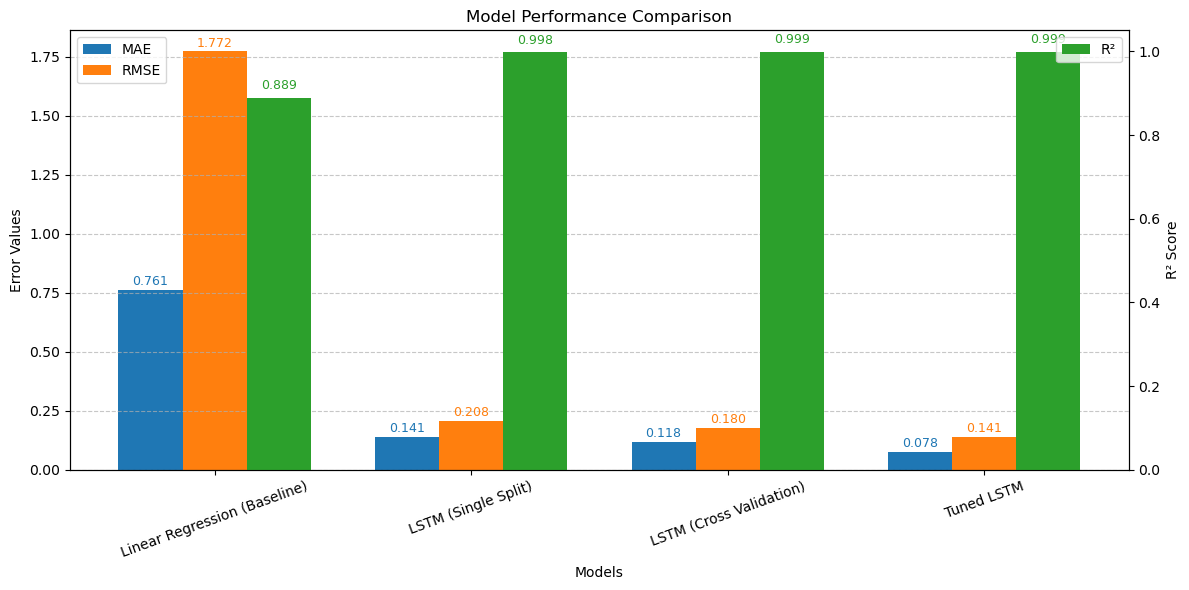

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values from results DataFrame
models = results['Model'].values
mae = results['MAE'].values
rmse = results['RMSE'].values
r2 = results['R²'].values

x = np.arange(len(models))
width = 0.25  

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot MAE and RMSE on primary y-axis
ax1.bar(x - width, mae, width, label='MAE', color='#1f77b4')
ax1.bar(x, rmse, width, label='RMSE', color='#ff7f0e')
ax1.set_ylabel('Error Values')
ax1.set_xlabel('Models')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=20, fontsize=10)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot R² on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + width, r2, width, label='R²', color='#2ca02c')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1.05)
ax2.legend(loc='upper right')

# Add value labels
for i in range(len(models)):
    ax1.text(x[i] - width, mae[i] + 0.02, f'{mae[i]:.3f}', ha='center', fontsize=9, color='#1f77b4')
    ax1.text(x[i], rmse[i] + 0.02, f'{rmse[i]:.3f}', ha='center', fontsize=9, color='#ff7f0e')
    ax2.text(x[i] + width, r2[i] + 0.02, f'{r2[i]:.3f}', ha='center', fontsize=9, color='#2ca02c')

plt.tight_layout()
plt.show()

In [32]:
# Save All Important Models & Results (Module 5)
import joblib
import json
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

save_dir_module4 = Path("saved_module4")
save_dir_module5 = Path("saved_module5")
save_dir_module5.mkdir(exist_ok=True)

# Load feature columns and scalers for LR
with open(save_dir_module4 / "feature_cols.json", "r") as f:
    feature_cols = json.load(f)
scaler_X = joblib.load(save_dir_module4 / "scaler_X.pkl")
scaler_y = joblib.load(save_dir_module4 / "scaler_y.pkl")

# Align and scale X_test
X_test_aligned = X_test[feature_cols]
X_test_scaled = scaler_X.transform(X_test_aligned)

# 1. Save Linear Regression metrics
y_pred_lr = baseline_lr_model.predict(X_test_scaled)
y_pred_lr_inv = scaler_y.inverse_transform(y_pred_lr.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test.values)

lr_mae = mean_absolute_error(y_test_inv, y_pred_lr_inv)
lr_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_lr_inv))
lr_r2 = r2_score(y_test_inv, y_pred_lr_inv)

lr_metrics = {"mae": float(lr_mae), "rmse": float(lr_rmse), "r2": float(lr_r2)}
with open(save_dir_module4 / "lr_metrics.json", "w") as f:
    json.dump(lr_metrics, f)

# 2. Save baseline LSTM model + metrics
lstm_model.save(save_dir_module5 / "baseline_lstm_model.keras")
baseline_metrics = {
    "mae": float(np.mean(mae)) if hasattr(mae, "__len__") else float(mae),
    "rmse": float(np.mean(rmse)) if hasattr(rmse, "__len__") else float(rmse),
    "r2": float(np.mean(r2)) if hasattr(r2, "__len__") else float(r2)
}
joblib.dump(baseline_metrics, save_dir_module5 / "baseline_metrics.pkl")

# 3. Save tuned LSTM model + metrics + history
best_model.save(save_dir_module5 / "tuned_lstm_model.keras")
tuned_metrics = {
    "mae": float(tuned_mae),
    "rmse": float(tuned_rmse),
    "r2": float(tuned_r2),
    "params": best_params
}
with open(save_dir_module5 / "tuned_lstm_metrics.json", "w") as f:
    json.dump(tuned_metrics, f)
joblib.dump(tuned_metrics, save_dir_module5 / "tuned_lstm_metrics.pkl")
with open(save_dir_module5 / "tuned_lstm_history.json", "w") as f:
    json.dump(history_tuned.history, f)

# 4. Save hyperparameter tuning results (only best_params, since best_metrics not defined)
joblib.dump(best_params, save_dir_module5 / "best_params.pkl")

# 5. Save cross-validation metrics
cv_metrics = {
    "cv_mae": [float(v) for v in cv_mae],
    "cv_rmse": [float(v) for v in cv_rmse],
    "cv_r2": [float(v) for v in cv_r2],
    "avg_mae": float(np.mean(cv_mae)),
    "avg_rmse": float(np.mean(cv_rmse)),
    "avg_r2": float(np.mean(cv_r2))
}
joblib.dump(cv_metrics, save_dir_module5 / "cv_metrics.pkl")

# 6. Save comparison table
results = pd.DataFrame([
    ["Linear Regression (Baseline)", lr_mae, lr_rmse, lr_r2],
    ["LSTM (Single Split)", float(np.mean(mae)), float(np.mean(rmse)), float(np.mean(r2))],
    ["LSTM (Cross Validation)", float(np.mean(cv_mae)), float(np.mean(cv_rmse)), float(np.mean(cv_r2))],
    ["Tuned LSTM", tuned_mae, tuned_rmse, tuned_r2]
], columns=["Model", "MAE", "RMSE", "R²"])
results.to_csv(save_dir_module5 / "comparison_table.csv", index=False)

print(" All important models and results from Module 5 saved successfully")

 All important models and results from Module 5 saved successfully


In [34]:
# Load All Important Models & Results (Module 5)
from tensorflow.keras.models import load_model
import joblib, json, pandas as pd
from pathlib import Path

save_dir4 = Path("saved_module4")
save_dir5 = Path("saved_module5")

# 1. Linear Regression metrics
with open(save_dir4 / "lr_metrics.json", "r") as f:
    lr_metrics = json.load(f)

# 2. Baseline LSTM
baseline_lstm = load_model(save_dir5 / "baseline_lstm_model.keras")
baseline_metrics = joblib.load(save_dir5 / "baseline_metrics.pkl")

# 3. Tuned LSTM
tuned_lstm = load_model(save_dir5 / "tuned_lstm_model.keras")
tuned_metrics = joblib.load(save_dir5 / "tuned_lstm_metrics.pkl")
with open(save_dir5 / "tuned_lstm_history.json", "r") as f:
    tuned_history = json.load(f)

# 4. Hyperparameter tuning
best_params = joblib.load(save_dir5 / "best_params.pkl")

# 5. Cross-validation
cv_metrics = joblib.load(save_dir5 / "cv_metrics.pkl")

# 6. Comparison table
comparison_table = pd.read_csv(save_dir5 / "comparison_table.csv")

# 7. Feature scalers
scaler_y = joblib.load(save_dir4 / "scaler_y.pkl")
scaler_X = joblib.load(save_dir4 / "scaler_X.pkl")

# Print summary
print(" Models and results loaded successfully!")
print("Best hyperparameters:", best_params)
print("Feature scalers loaded.")
print("\n Comparison Table Preview:\n", comparison_table.round(4))

C:\Users\avuno\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 Models and results loaded successfully!
Best hyperparameters: (64, 0.2, 0.0005, 64)
Feature scalers loaded.

 Comparison Table Preview:
                           Model     MAE    RMSE      R²
0  Linear Regression (Baseline)  0.7612  1.7723  0.8888
1           LSTM (Single Split)  0.2745  0.5751  0.9713
2       LSTM (Cross Validation)  0.1177  0.1795  0.9988
3                    Tuned LSTM  0.0779  0.1411  0.9993


# Module 6: Model Evaluation and Integration
## Smart Home Energy Consumption Analysis
### Objective:
- Evaluate models using MAE, RMSE, and R²
- Select the best-performing model
- Save trained model and scalers
- Convert model to Flask-compatible prediction function
- Test predictions using sample inputs

In [59]:
# Module 6: End-to-End Model Evaluation, Saving, and Sample Prediction
import pandas as pd
import numpy as np
import joblib, json
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

#  Step 1: Feature Engineering & Preprocessing 
df = pd.read_csv("preprocessed_energy_data.csv", index_col=0, parse_dates=True)

df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["is_weekend"] = (df.index.dayofweek >= 5).astype(int)

df["lag_1"] = df["total_energy"].shift(1)
df["lag_24"] = df["total_energy"].shift(24)
df["ma_3"] = df["total_energy"].rolling(window=3).mean()
df["ma_24"] = df["total_energy"].rolling(window=24).mean()

for i in range(7):
    df[f"dow_{i}"] = (df.index.dayofweek == i).astype(int)

df["current_energy"] = df["total_energy"]

if "device" not in df.columns:
    df["device"] = "Fridge"
if "time_feature" not in df.columns:
    df["time_feature"] = "daily"

df = pd.get_dummies(df, columns=["device","time_feature"])
df.to_csv("processed_energy_data.csv")
print("Columns after preprocessing:", df.columns.tolist())

#  Step 2: Train/Test Split 
feature_cols = [
    "hour","day","month","is_weekend",
    "lag_1","lag_24","ma_3","ma_24",
    "dow_0","dow_1","dow_2","dow_3","dow_4","dow_5","dow_6",
    "current_energy"
] + [col for col in df.columns if col.startswith("device_") or col.startswith("time_feature_")]

X = df[feature_cols].dropna()
y = df["total_energy"].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.to_csv("saved_module4/splits/X_train.csv")
y_train.to_csv("saved_module4/splits/y_train.csv")
X_test.to_csv("saved_module4/splits/X_test.csv")
y_test.to_csv("saved_module4/splits/y_test.csv")

joblib.dump(feature_cols, "feature_cols.pkl")
print("Train/test splits saved with device + time_feature included!")

#  Step 3: Model Evaluation and Integration 
save_dir4 = Path("saved_module4")
save_dir5 = Path("saved_module5")

with open(save_dir4 / "lr_metrics.json", "r") as f:
    lr_metrics = json.load(f)

baseline_lstm = load_model(save_dir5 / "baseline_lstm_model.keras")
baseline_metrics = joblib.load(save_dir5 / "baseline_metrics.pkl")

tuned_lstm = load_model(save_dir5 / "tuned_lstm_model.keras")
tuned_metrics = joblib.load(save_dir5 / "tuned_lstm_metrics.pkl")

comparison_table = pd.read_csv(save_dir5 / "comparison_table.csv")
scaler_X = joblib.load(save_dir4 / "scaler_X.pkl")

best_model_name = comparison_table.loc[comparison_table["MAE"].idxmin(), "Model"]
print("Best performing model:", best_model_name)

#  Step 4: Train & Save Best Model 
if best_model_name == "Baseline LR":
    pipeline = Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", Ridge(alpha=1.0))
    ])
    pipeline.fit(X_train[feature_cols], y_train.values.ravel())

    joblib.dump(pipeline, "energy_pipeline.pkl")
    joblib.dump(feature_cols, "feature_cols.pkl")
    joblib.dump(X_train[feature_cols].mean().to_dict(), "default_values.pkl")
    print("Best LR pipeline saved for Flask!")
else:
    tuned_lstm.save("tuned_lstm_model.keras", include_optimizer=False)
    joblib.dump(scaler_X, "scaler_X.pkl")
    joblib.dump(feature_cols, "feature_cols.pkl")
    joblib.dump(24, "timesteps.pkl")  # adjust timesteps if different
    default_values = X_test.mean().to_dict()
    joblib.dump(default_values, "default_values.pkl")
    print("Best LSTM model and objects saved for Flask!")

#  Step 5: Sample Input Test 
pipeline = joblib.load("energy_pipeline.pkl")
feature_cols = joblib.load("feature_cols.pkl")
default_values = joblib.load("default_values.pkl")

sample_input = {
    "hour": 14, "day": 2, "month": 1, "is_weekend": 0,
    "lag_1": 2.8, "lag_24": 2.7, "ma_3": 2.75, "ma_24": 2.72,
    "dow_0": 0, "dow_1": 0, "dow_2": 1, "dow_3": 0,
    "dow_4": 0, "dow_5": 0, "dow_6": 0,
    "current_energy": 2.8,
    "device_Fridge": 1, "device_Air Conditioner": 0,
    "device_Dishwasher": 0, "device_Laundry": 0, "device_Microwave": 0,
    "time_feature_hourly": 0, "time_feature_daily": 1,
    "time_feature_weekly": 0, "time_feature_monthly": 0
}

input_df = pd.DataFrame([{col: sample_input.get(col, default_values.get(col, 0))
                          for col in feature_cols}])[feature_cols]

prediction = pipeline.predict(input_df)[0]
print(f"Predicted Energy Consumption: {round(prediction, 2)} kWh")

Columns after preprocessing: ['dishwasher', 'home office', 'fridge', 'wine cellar', 'garage door', 'barn', 'well', 'microwave', 'living room', 'furnace', 'kitchen', 'car charger kw', 'water heater kw', 'air conditioning kw', 'home theater kw', 'outdoor lights kw', 'laundry kw', 'pool pump kw', 'total_energy', 'hour', 'day', 'month', 'is_weekend', 'lag_1', 'lag_24', 'ma_3', 'ma_24', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'current_energy', 'device_Fridge', 'time_feature_daily']
Train/test splits saved with device + time_feature included!


C:\Users\avuno\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best performing model: Tuned LSTM
Best LSTM model and objects saved for Flask!
Predicted Energy Consumption: 2.8 kWh


# Module 7: Dashboard and visualization
- Build dashboard components for hourly/daily/weekly/monthly consumption. 
- Display device-wise usage charts using matplotlib.
- Integrate smart suggestions feature (energy efficiency tips).

### Build Dashboard Components for Hourly/Daily/Weekly/Monthly Consumption
- Visualize energy consumption over hourly, daily, weekly, and monthly intervals.
- Resample data to these intervals for better analysis.
- Helps identify trends and peak usage periods.

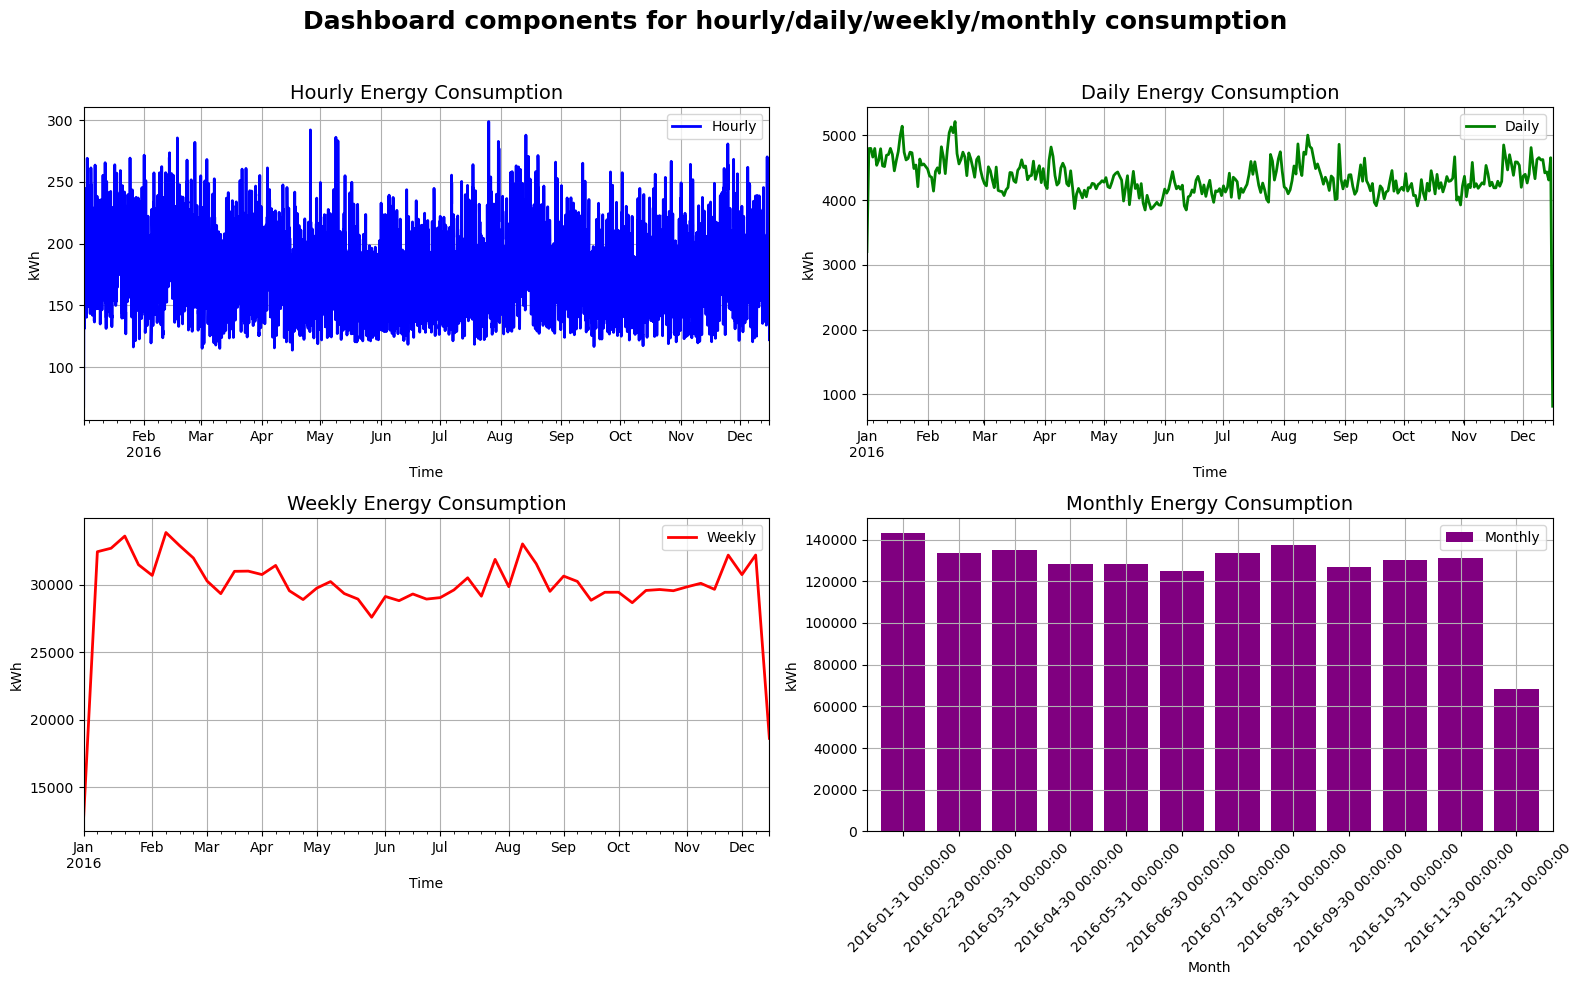

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_energy_data.csv', index_col=0, parse_dates=True)
# Ensure the 'timestamp' column is in datetime format
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
# Resample the data
df_hourly = df.resample('h').sum()
df_daily = df.resample('D').sum()
df_weekly = df.resample('W').sum()
df_monthly = df.resample('ME').sum()

# Create a dashboard with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# Main dashboard title
fig.suptitle("Dashboard components for hourly/daily/weekly/monthly consumption", fontsize=18, fontweight='bold')
#  Hourly Consumption Plot 
df_hourly['total_energy'].plot(ax=axes[0,0], color='blue', linewidth=2, label="Hourly")
axes[0,0].set_title("Hourly Energy Consumption", fontsize=14)
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("kWh")
axes[0,0].legend()
axes[0,0].grid(True)
#  Daily Consumption Plot 
df_daily['total_energy'].plot(ax=axes[0,1], color='green', linewidth=2, label="Daily")
axes[0,1].set_title("Daily Energy Consumption", fontsize=14)
axes[0,1].set_xlabel("Time")
axes[0,1].set_ylabel("kWh")
axes[0,1].legend()
axes[0,1].grid(True)
#  Weekly Consumption Plot 
df_weekly['total_energy'].plot(ax=axes[1,0], color='red', linewidth=2, label="Weekly")
axes[1,0].set_title("Weekly Energy Consumption", fontsize=14)
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("kWh")
axes[1,0].legend()
axes[1,0].grid(True)
#  Monthly Consumption Bar Graph 
df_monthly['total_energy'].plot(kind='bar', ax=axes[1,1], color='purple', width=0.8, label="Monthly")
axes[1,1].set_title("Monthly Energy Consumption", fontsize=14)
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("kWh")
axes[1,1].legend()
axes[1,1].grid(True)
for tick in axes[1,1].get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the suptitle
plt.show()

### Display Device-Wise Usage Charts using Matplotlib
- Visualize total energy consumption for each device.
- Use a bar chart to compare energy usage across devices.
- Helps identify which devices consume the most energy.

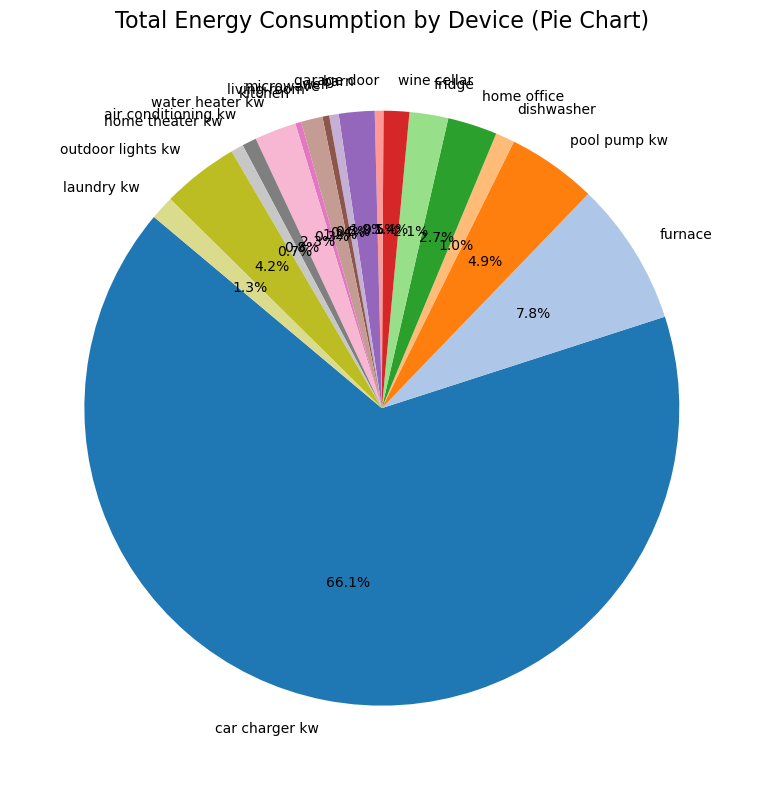

In [45]:
import matplotlib.pyplot as plt
device_columns = [
    'car charger kw','furnace','pool pump kw','dishwasher','home office','fridge',
    'wine cellar','garage door','barn','well','microwave','living room','kitchen',
    'water heater kw','air conditioning kw','home theater kw','outdoor lights kw','laundry kw'
]
# We can Resample the data as needed (e.g., daily, weekly, monthly)
df_resampled = df.resample('D').sum()  # Resampling daily to sum up total energy for each day

# Calculate total energy consumption per device over the entire period (sum of daily consumption)
device_totals = df_resampled[device_columns].sum()

# Plot the total energy consumption for each device as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    device_totals,
    labels=device_totals.index,
    autopct='%1.1f%%',       # Show percentages
    startangle=140,          # Rotate start angle for better layout
    colors=plt.cm.tab20.colors  # Use a colormap for distinct colors
)
plt.title("Total Energy Consumption by Device (Pie Chart)", fontsize=16)
plt.tight_layout()
plt.show()

### Integrate Smart Suggestions Feature (Energy Efficiency Tips)
- Generate energy-saving tips based on consumption data.
- Tips include peak usage times, high-consuming devices, and continuous energy draw.
- Helps users optimize energy usage and reduce waste.

In [24]:
import pandas as pd

# Assuming you already have df_resampled with energy data
# Function to generate energy efficiency tips based on data
def energy_efficiency_tips(df):
    tips = []
    
    # 1. Tip based on peak energy consumption during certain hours
    peak_usage_threshold = df['total_energy'].quantile(0.9)  # Using 90th percentile for peak usage
    high_usage_hours = df[df['total_energy'] > peak_usage_threshold]
    
    if not high_usage_hours.empty:
        tips.append("Smart Tip: Energy consumption is higher during certain hours. Consider reducing usage during peak times.")
    
    # 2. Tip based on high energy consumption by specific devices
    high_device_usage_threshold = df[device_columns].quantile(0.9)  # 90th percentile for each device
    for device in device_columns:
        device_usage = df[device].sum()  # Total usage of each device over the period
        if device_usage > high_device_usage_threshold[device]:
            tips.append(f"Smart Tip: {device.capitalize()} is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.")
    
    # 3. Tip for devices showing continuous energy usage
    continuous_usage_threshold = 0.1  # Set a threshold for identifying continuous usage (in kWh)
    continuous_usage_devices = df[df['air conditioning kw'] > continuous_usage_threshold]  # Example with 'air conditioning kw'
    if not continuous_usage_devices.empty:
        tips.append("Smart Tip: Your AC is showing continuous energy draw. Consider adjusting the thermostat or using it more efficiently.")
    
    # 4. General tip based on overall energy consumption
    avg_energy_consumption = df['total_energy'].mean()
    if avg_energy_consumption > 1000:  # Adjust threshold as needed (in kWh)
        tips.append("Smart Tip: Overall energy consumption is high. Consider using more energy-efficient appliances or investing in smart energy-saving devices.")
    
    # Return the list of tips
    return tips

# Get energy efficiency tips
tips = energy_efficiency_tips(df_resampled)
for tip in tips:
    print(tip)

Smart Tip: Energy consumption is higher during certain hours. Consider reducing usage during peak times.
Smart Tip: Car charger kw is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Furnace is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Pool pump kw is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Dishwasher is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Home office is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Fridge is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Wine cellar is using a lot of energy. Ensure it is in good condition

In [102]:
# Dashboard Summary
print(" Dashboard Summary")
print("- Hourly/Daily/Weekly/Monthly consumption visualized.")
print("- Device-wise usage charts displayed.")
print("- Smart suggestions generated for energy efficiency.\n")

print("Smart Energy Tips:")
for tip in tips:
    print(tip)

 Dashboard Summary
- Hourly/Daily/Weekly/Monthly consumption visualized.
- Device-wise usage charts displayed.
- Smart suggestions generated for energy efficiency.

Smart Energy Tips:
Smart Tip: Energy consumption is higher during certain hours. Consider reducing usage during peak times.
Smart Tip: Car charger kw is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Furnace is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Pool pump kw is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Dishwasher is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Home office is using a lot of energy. Ensure it is in good condition or consider replacing it with an energy-efficient model.
Smart Tip: Fridge is using 

# Module 8 : Web Application Deployment and Reporting.
- Develop Flask API connect frontend with ML model.
- Build interactive web interface using HTML, CSS, JavaScript. 
- Deploy web app on local host or cloud.
- Prepare detailed documentation, testing report, and result summary